In [104]:
# Importing necessary libraries
import pandas as pd       # Data manipulation
import numpy as np        # Numerical operations
import seaborn as sns     # Data visualization
import matplotlib.pyplot as plt  # Plotting

from sklearn.model_selection import train_test_split  # Splitting data
from sklearn.preprocessing import StandardScaler  # Scaling features
from sklearn.metrics import confusion_matrix, classification_report  # Evaluation metrics

from imblearn.over_sampling import SMOTE

import sklearn.linear_model as lm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, f1_score, precision_score, recall_score
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option('display.max_columns', None)

## 1. Collect or load Data.

In [2]:
df = pd.read_csv("Data/bank-additional/bank-additional-full.csv", sep=';')
df.head(3)

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93.994          -36.4      4.857       5191.0  no  
1           1.1          93.994          -36.4      4.857       5191.0  no  
2           1.1          93.994          -36.4      4.857       5191.0  no

## 2. Domain Analysis

#### 1. Domain - Finance/Banking
#### 2. Business Problem -
#### Task 1:-Prepare a complete data analysis report on the given data.
#### Task 2:-Create a predictive model which will help the bank marketing team to know which customer will buy the Product
#### Task3:-Suggestions to the Bank market team to make  customers  buy the product.

## 3. Basic checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [5]:
df.describe(include = 'object')

job  marital          education default housing   loan   contact  \
count    41188    41188              41188   41188   41188  41188     41188   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10422    24928              12168   32588   21576  33950     26144   

        month day_of_week     poutcome      y  
count   41188       41188        41188  41188  
unique     10           5            3      2  
top       may         thu  nonexistent     no  
freq    13769        8623        35563  36548

# 4. EDA(Exploratory Data Analysis)

## I - Univariate Analysis

### i. Discrete Columns

In [6]:
num_cols = df.select_dtypes(include=['number']).columns
num_cols = df[num_cols]
num_cols.head(1)

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  
0          -36.4      4.857       5191.0

In [7]:
dis_cols = [col for col in num_cols if len(num_cols[col].unique()) <= 25]
dis_cols = df[dis_cols]

In [8]:
dis_cols.head(1)

previous  emp.var.rate  nr.employed
0         0           1.1       5191.0

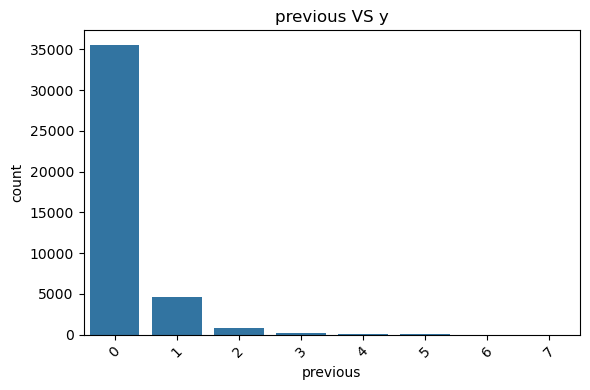

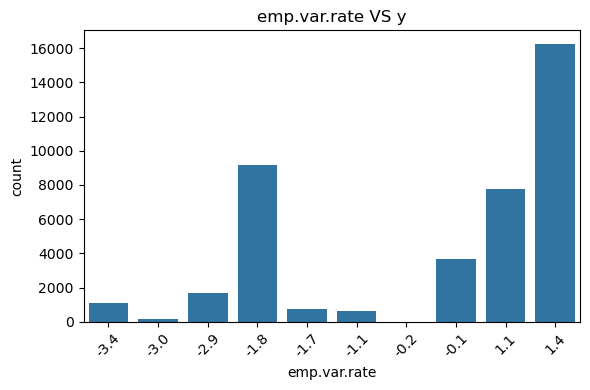

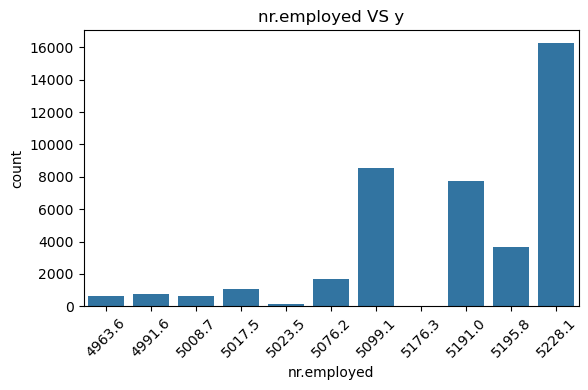

In [9]:
for col in dis_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.xticks(rotation = 45)
    plt.title(f"{col} VS y")
    plt.tight_layout()
    plt.show()

### ii. Continuous columns.

In [10]:
con_cols = [col for col in num_cols.columns if col not in dis_cols]
con_cols = df[con_cols]
con_cols.head(2)

age  duration  campaign  pdays  cons.price.idx  cons.conf.idx  euribor3m
0   56       261         1    999          93.994          -36.4      4.857
1   57       149         1    999          93.994          -36.4      4.857

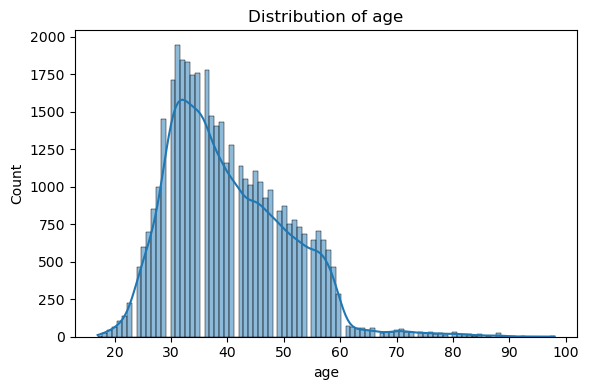

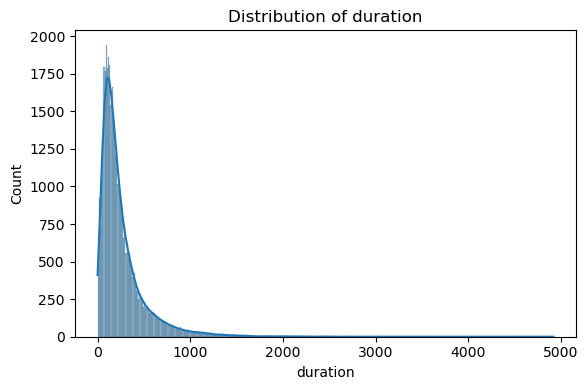

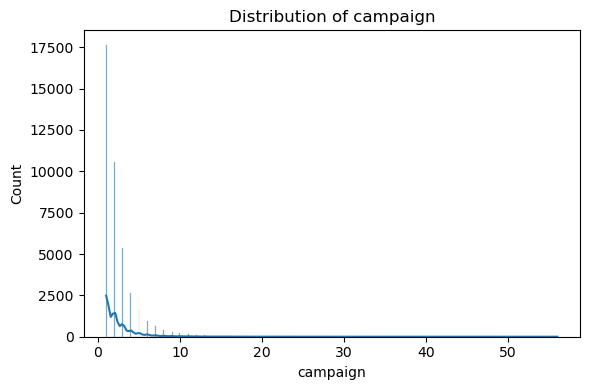

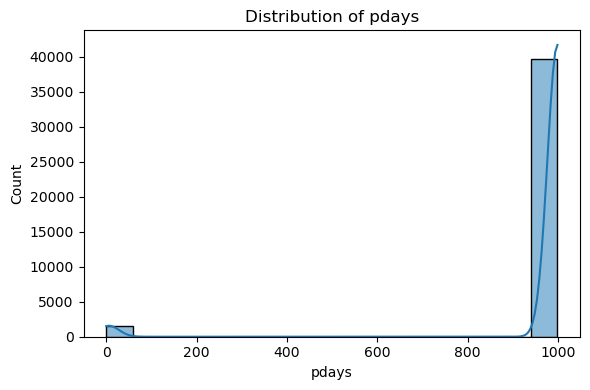

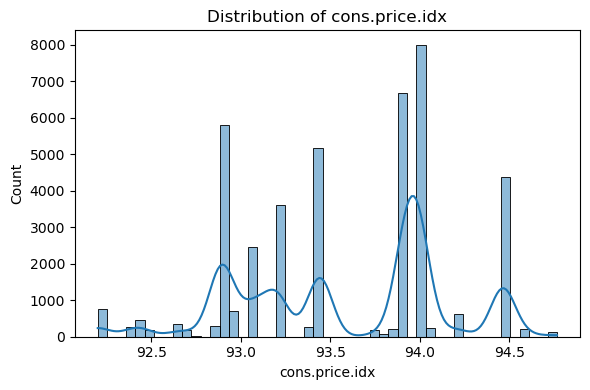

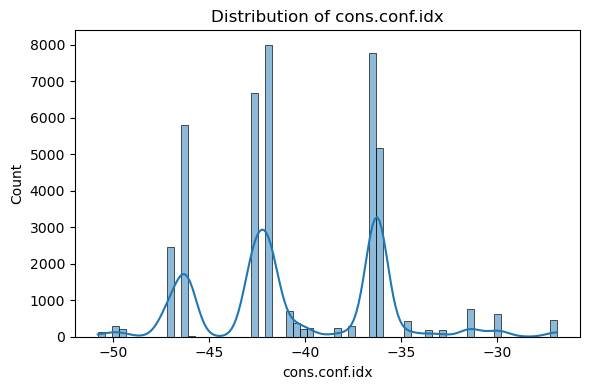

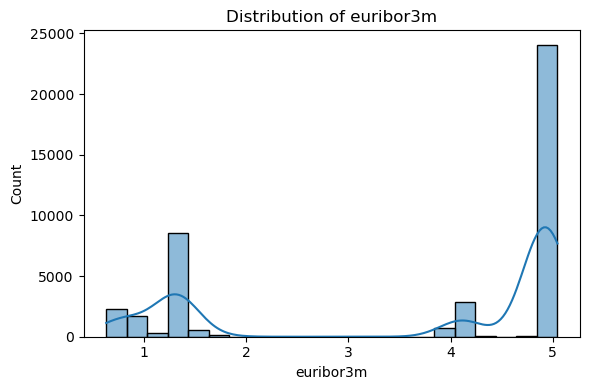

In [11]:
for col in con_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(x=col, data=df, kde=True)
    plt.xticks(rotation=0)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

### iii - Categorical Columns

In [11]:
cat_cols = [col for col in df if col not in num_cols]
cat_cols = df[cat_cols]
cat_cols.head(2)

job  marital    education  default housing loan    contact month  \
0  housemaid  married     basic.4y       no      no   no  telephone   may   
1   services  married  high.school  unknown      no   no  telephone   may   

  day_of_week     poutcome   y  
0         mon  nonexistent  no  
1         mon  nonexistent  no


Column: job
job
admin.           25.303486
blue-collar      22.467709
technician       16.371273
services          9.636302
management        7.099155
retired           4.175974
entrepreneur      3.535010
self-employed     3.450034
housemaid         2.573565
unemployed        2.461882
student           2.124405
unknown           0.801204
Name: proportion, dtype: float64


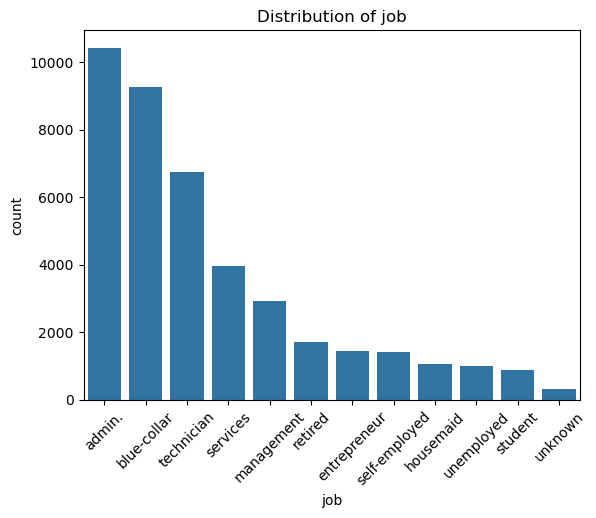


Column: marital
marital
married     60.522482
single      28.085850
divorced    11.197436
unknown      0.194231
Name: proportion, dtype: float64


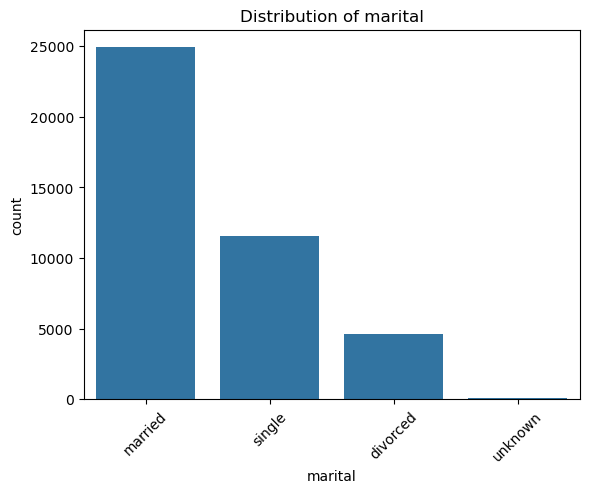


Column: education
education
university.degree      29.542585
high.school            23.101389
basic.9y               14.676605
professional.course    12.729436
basic.4y               10.138875
basic.6y                5.564728
unknown                 4.202680
illiterate              0.043702
Name: proportion, dtype: float64


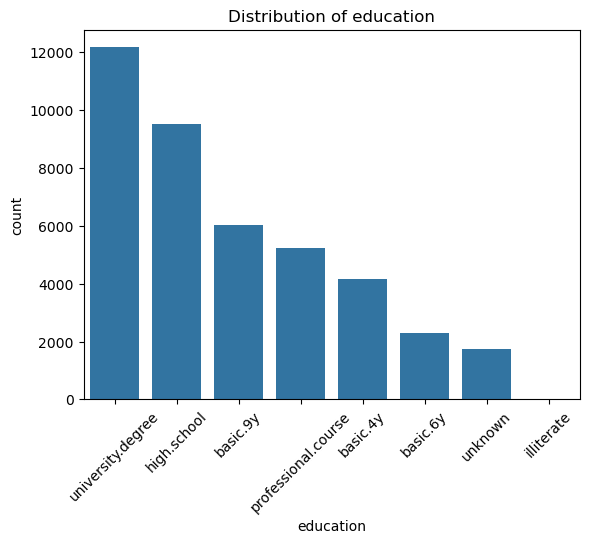


Column: default
default
no         79.120132
unknown    20.872584
yes         0.007284
Name: proportion, dtype: float64


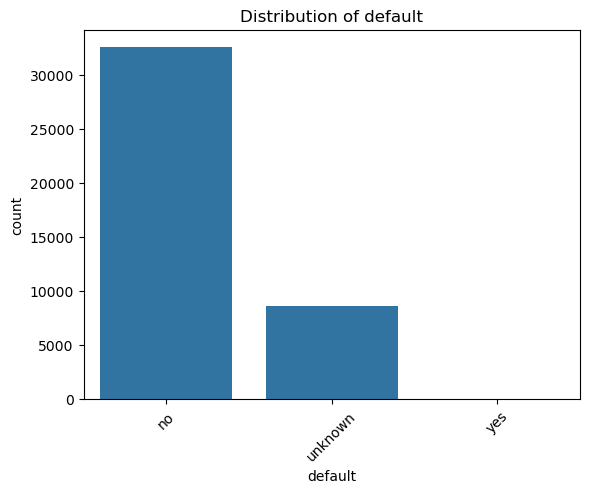


Column: housing
housing
yes        52.384190
no         45.212198
unknown     2.403613
Name: proportion, dtype: float64


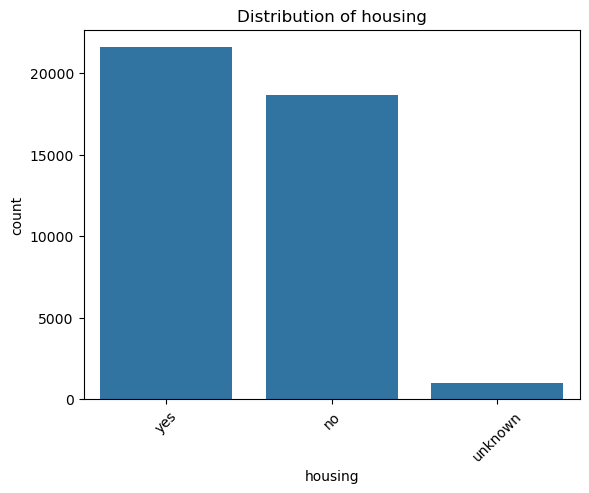


Column: loan
loan
no         82.426920
yes        15.169467
unknown     2.403613
Name: proportion, dtype: float64


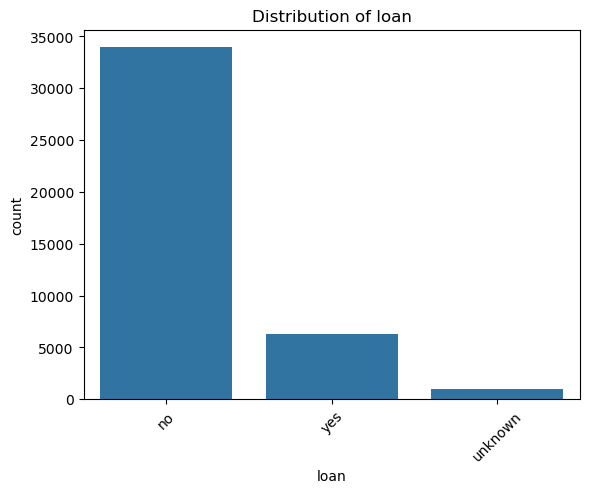


Column: contact
contact
cellular     63.474798
telephone    36.525202
Name: proportion, dtype: float64


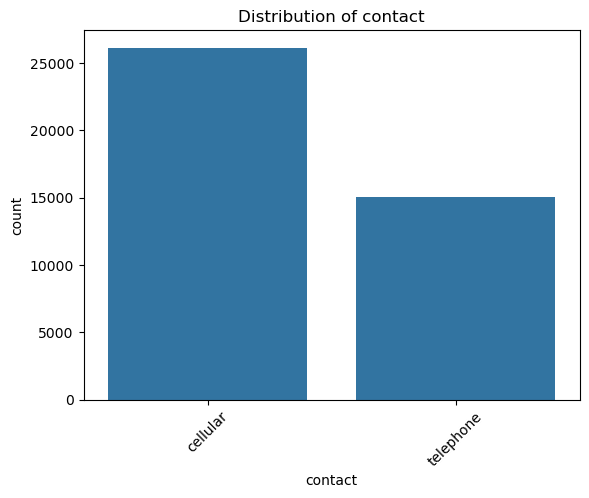


Column: month
month
may    33.429640
jul    17.417694
aug    14.999514
jun    12.911528
nov     9.956784
apr     6.390211
oct     1.743226
sep     1.383898
mar     1.325629
dec     0.441876
Name: proportion, dtype: float64


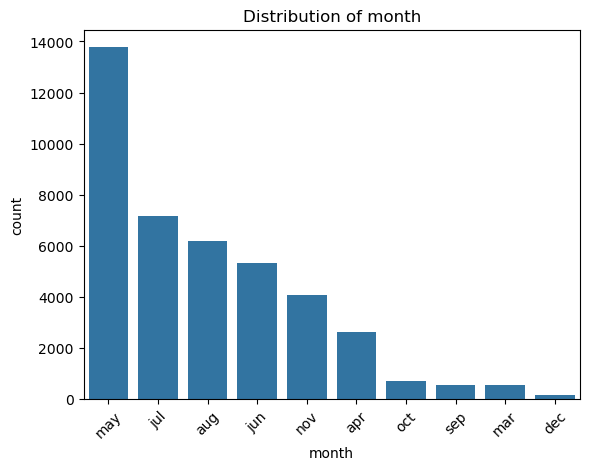


Column: day_of_week
day_of_week
thu    20.935709
mon    20.671069
wed    19.748470
tue    19.641643
fri    19.003108
Name: proportion, dtype: float64


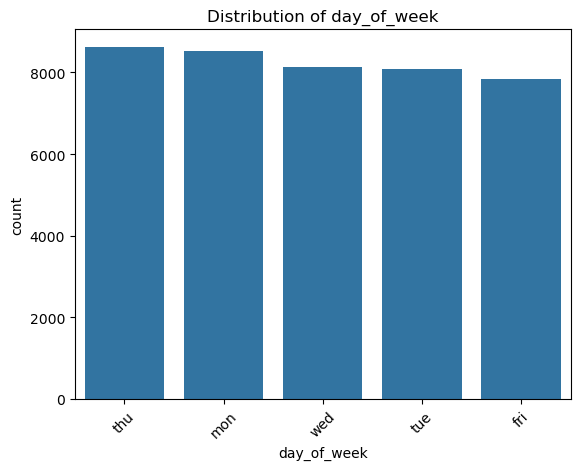


Column: poutcome
poutcome
nonexistent    86.343110
failure        10.323395
success         3.333495
Name: proportion, dtype: float64


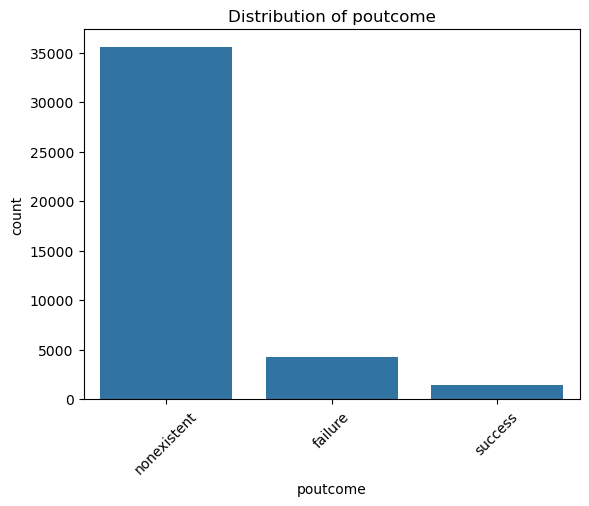


Column: y
y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64


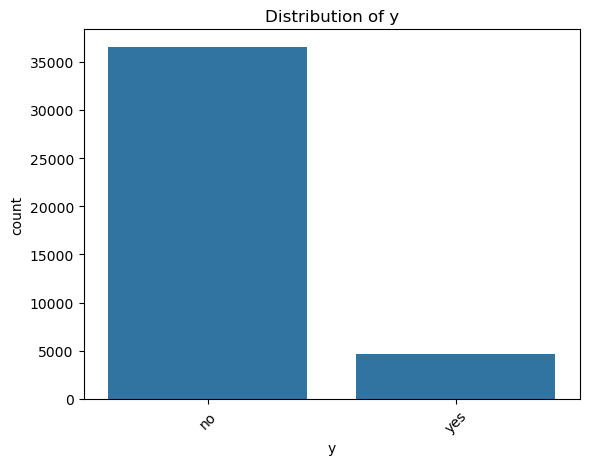

In [11]:
for col in cat_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts(normalize=True) * 100)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.show()

## II - Bivariate Analysis

### i. Discrete Columns

previous
0    86.343110
1    11.073614
2     1.830630
3     0.524425
4     0.169952
5     0.043702
6     0.012139
7     0.002428
Name: proportion, dtype: float64


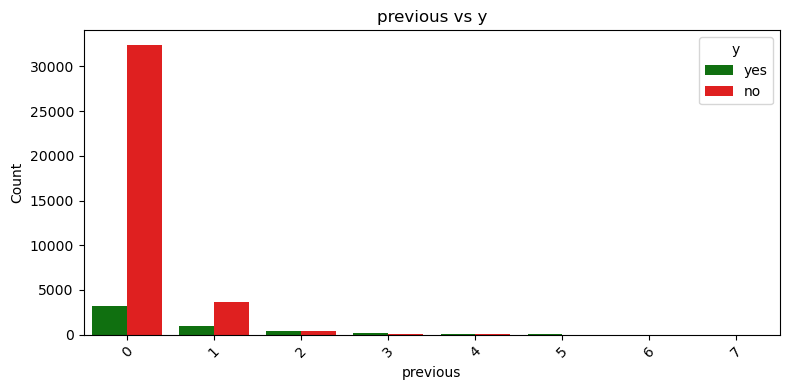

emp.var.rate
 1.4    39.414393
-1.8    22.297757
 1.1    18.847723
-0.1     8.941925
-2.9     4.037584
-3.4     2.600272
-1.7     1.876760
-1.1     1.541711
-3.0     0.417597
-0.2     0.024279
Name: proportion, dtype: float64


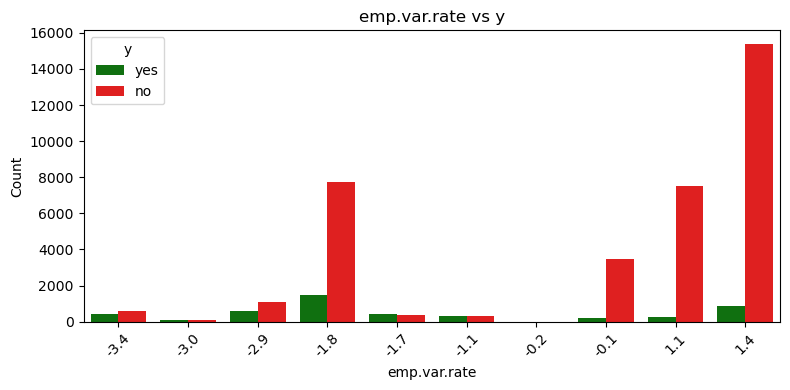

nr.employed
5228.1    39.414393
5099.1    20.719627
5191.0    18.847723
5195.8     8.941925
5076.2     4.037584
5017.5     2.600272
4991.6     1.876760
5008.7     1.578130
4963.6     1.541711
5023.5     0.417597
5176.3     0.024279
Name: proportion, dtype: float64


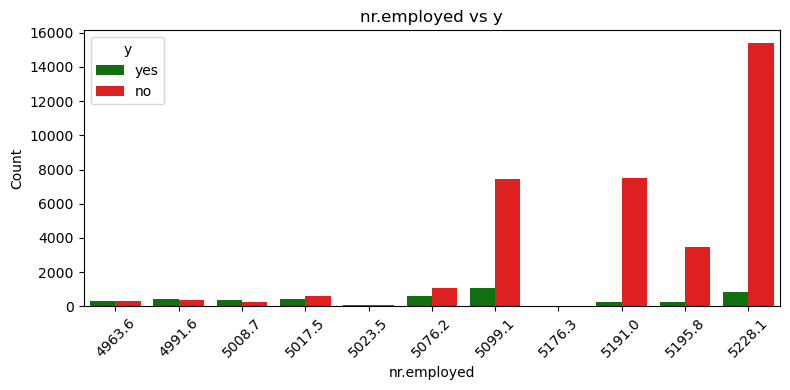

In [12]:
color_palette = {'yes': 'green', 'no': 'red'}

for col in dis_cols:
    print(df[col].value_counts(normalize=True) * 100)
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col], hue=df['y'].astype('str'), hue_order=['yes', 'no'], palette=color_palette)
    plt.xticks(rotation=45)
    plt.title(f"{col} vs y")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title='y')
    plt.tight_layout()
    plt.show()

### ii - Continuous Columns

age
31    4.727105
32    4.481888
33    4.450325
36    4.321647
35    4.270661
        ...   
89    0.004856
91    0.004856
94    0.002428
87    0.002428
95    0.002428
Name: proportion, Length: 78, dtype: float64


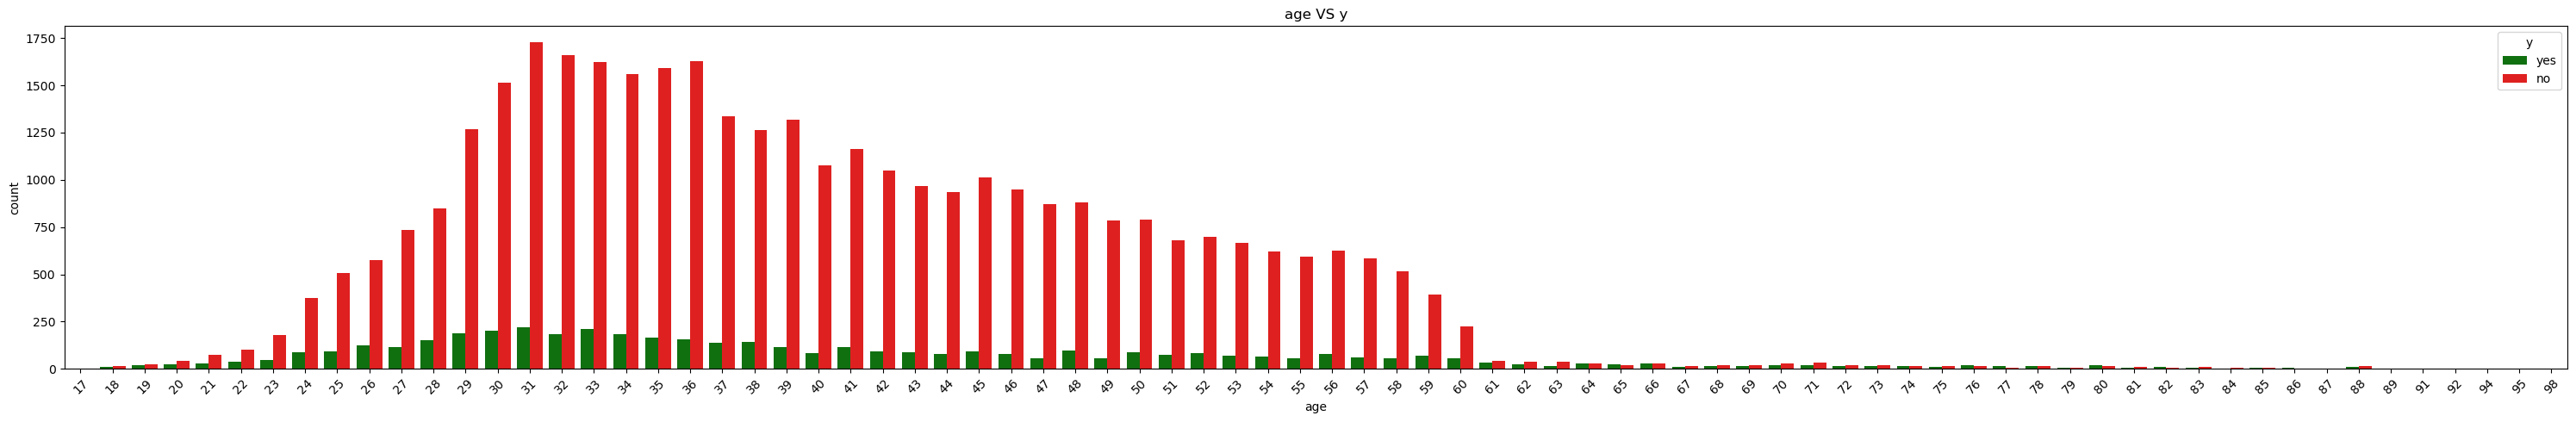

duration
90      0.412742
85      0.412742
136     0.407886
73      0.405458
124     0.398174
          ...   
1569    0.002428
1053    0.002428
1263    0.002428
1169    0.002428
1868    0.002428
Name: proportion, Length: 1544, dtype: float64


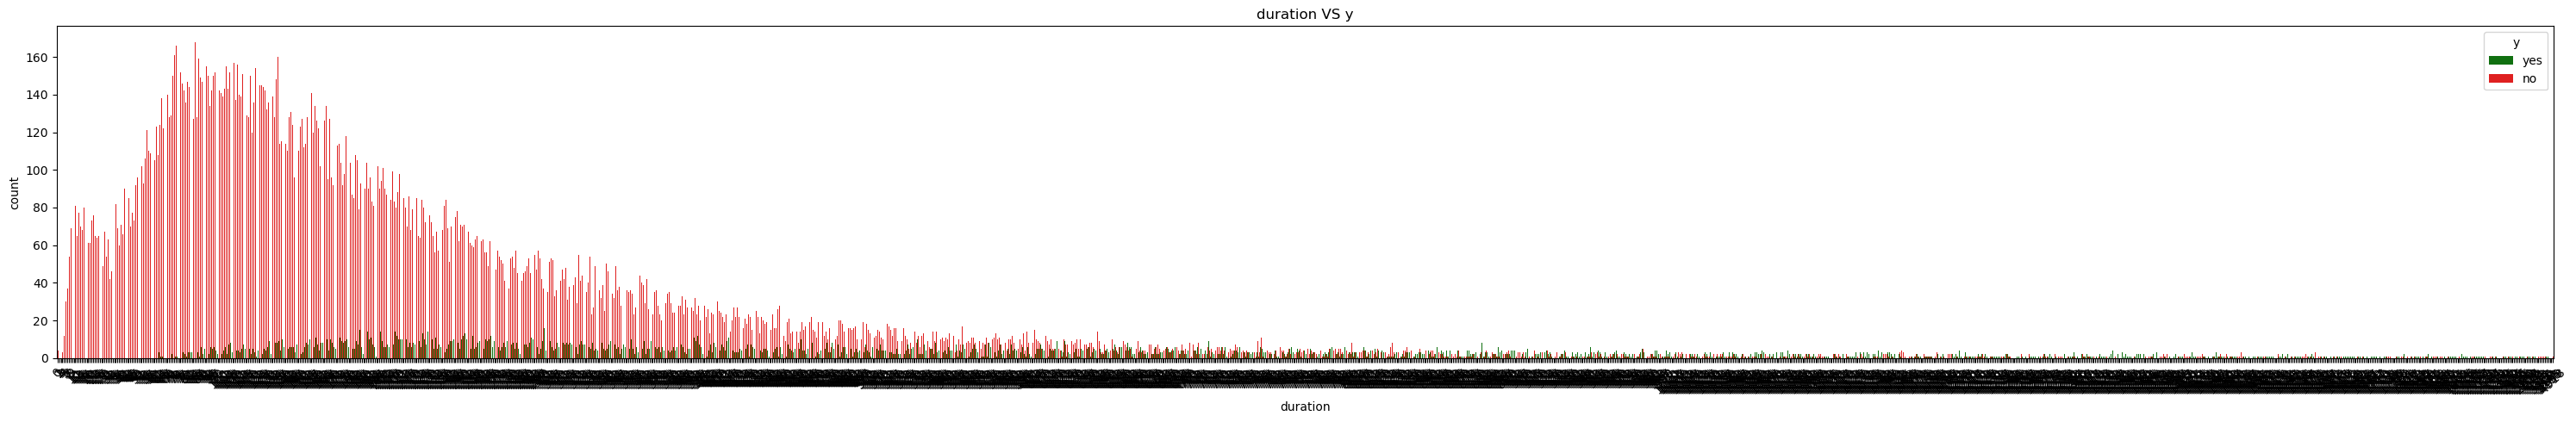

campaign
1     42.832864
2     25.662814
3     12.967369
4      6.436341
5      3.882199
6      2.376906
7      1.527144
8      0.971157
9      0.687093
10     0.546276
11     0.429737
12     0.303486
13     0.223366
14     0.167525
17     0.140818
16     0.123822
15     0.123822
18     0.080120
20     0.072837
19     0.063125
21     0.058269
22     0.041274
23     0.038846
24     0.036418
27     0.026707
29     0.024279
28     0.019423
26     0.019423
25     0.019423
31     0.016995
30     0.016995
35     0.012139
32     0.009712
33     0.009712
34     0.007284
42     0.004856
40     0.004856
43     0.004856
56     0.002428
39     0.002428
41     0.002428
37     0.002428
Name: proportion, dtype: float64


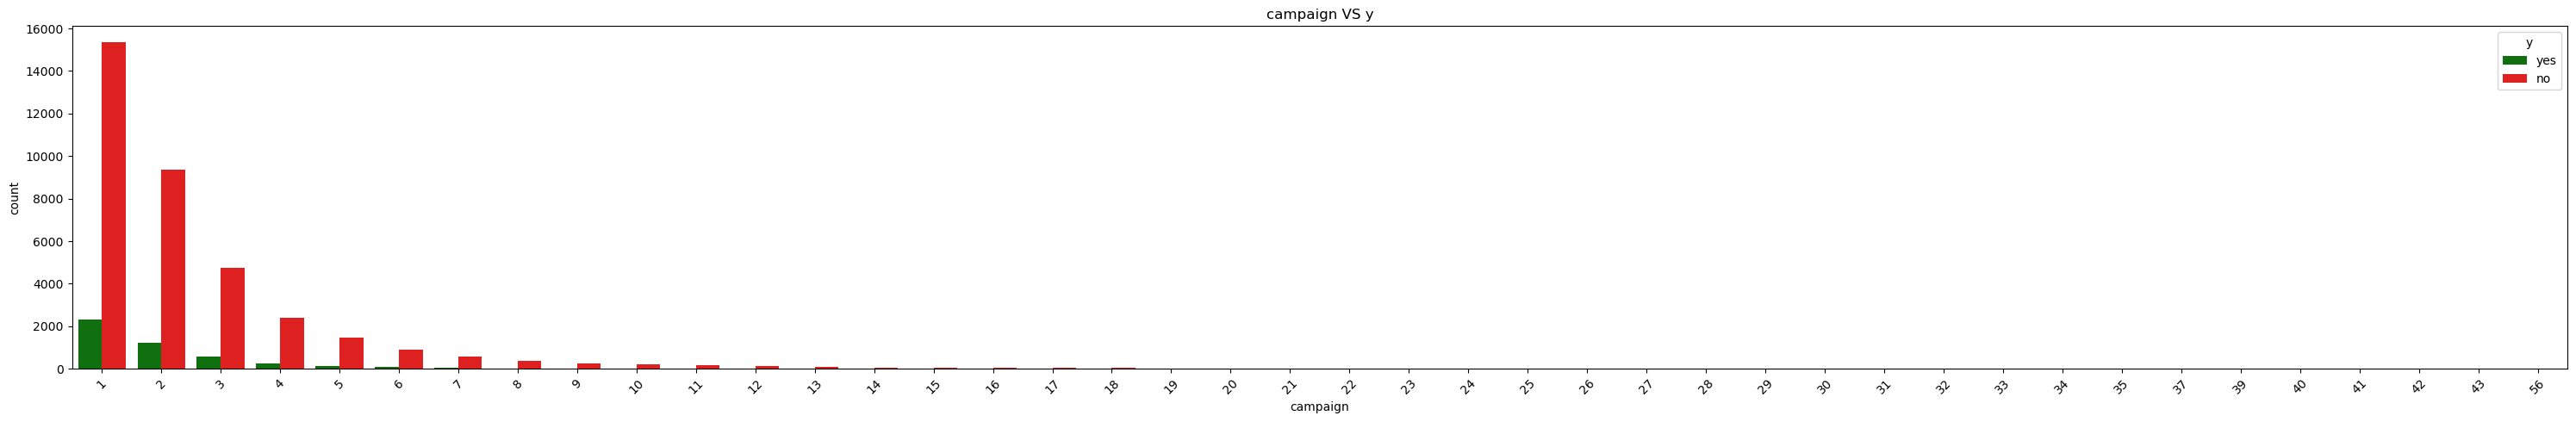

pdays
999    96.321744
3       1.065844
6       1.000291
4       0.286491
9       0.155385
2       0.148101
7       0.145673
12      0.140818
10      0.126250
5       0.111683
13      0.087404
11      0.067981
1       0.063125
15      0.058269
14      0.048558
8       0.043702
0       0.036418
16      0.026707
17      0.019423
18      0.016995
22      0.007284
19      0.007284
21      0.004856
25      0.002428
26      0.002428
27      0.002428
20      0.002428
Name: proportion, dtype: float64


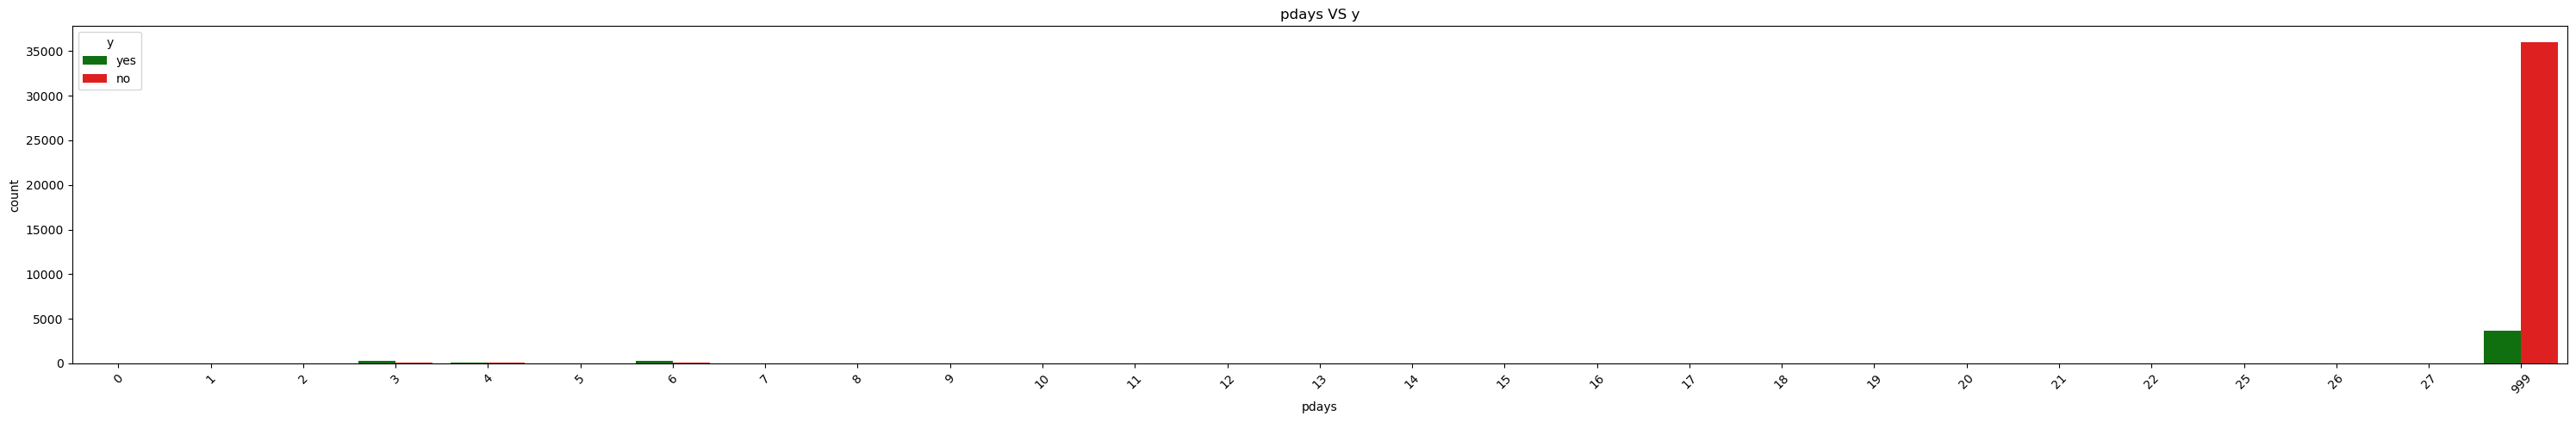

cons.price.idx
93.994    18.847723
93.918    16.230455
92.893    14.067204
93.444    12.564339
94.465    10.619598
93.200     8.779256
93.075     5.967758
92.201     1.869477
92.963     1.735943
92.431     1.085268
92.649     0.866757
94.215     0.755074
94.199     0.735651
92.843     0.684665
92.379     0.648247
93.369     0.640963
94.027     0.565699
94.055     0.555987
93.876     0.514713
94.601     0.495290
92.469     0.432165
93.749     0.422453
92.713     0.417597
94.767     0.310770
93.798     0.162669
92.756     0.024279
Name: proportion, dtype: float64


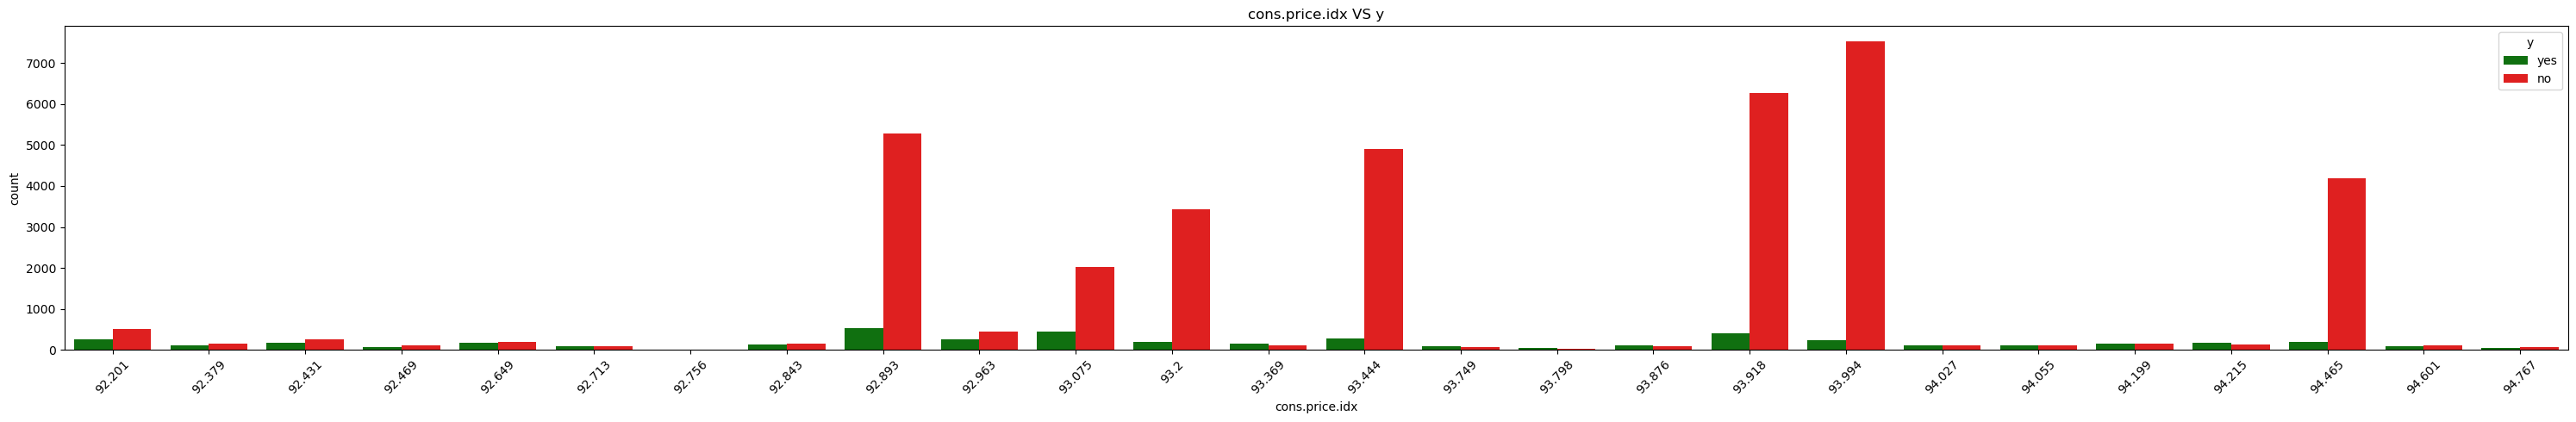

cons.conf.idx
-36.4    18.847723
-42.7    16.230455
-46.2    14.067204
-36.1    12.564339
-41.8    10.619598
-42.0     8.779256
-47.1     5.967758
-31.4     1.869477
-40.8     1.735943
-26.9     1.085268
-30.1     0.866757
-40.3     0.755074
-37.5     0.735651
-50.0     0.684665
-29.8     0.648247
-34.8     0.640963
-38.3     0.565699
-39.8     0.555987
-40.0     0.514713
-49.5     0.495290
-33.6     0.432165
-34.6     0.422453
-33.0     0.417597
-50.8     0.310770
-40.4     0.162669
-45.9     0.024279
Name: proportion, dtype: float64


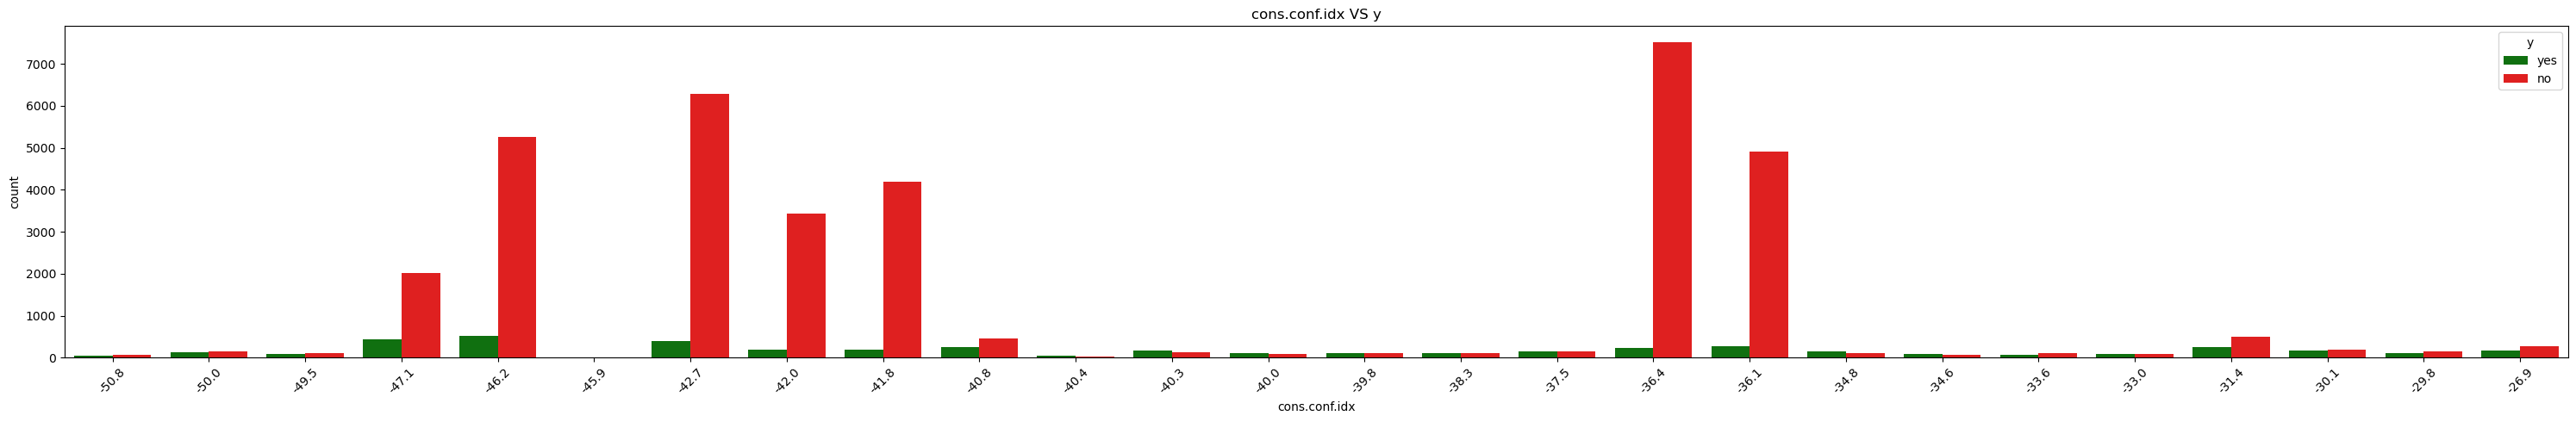

euribor3m
4.857    6.963193
4.962    6.344081
4.963    6.038166
4.961    4.617850
4.856    2.937749
           ...   
3.853    0.002428
3.901    0.002428
0.969    0.002428
0.956    0.002428
3.669    0.002428
Name: proportion, Length: 316, dtype: float64


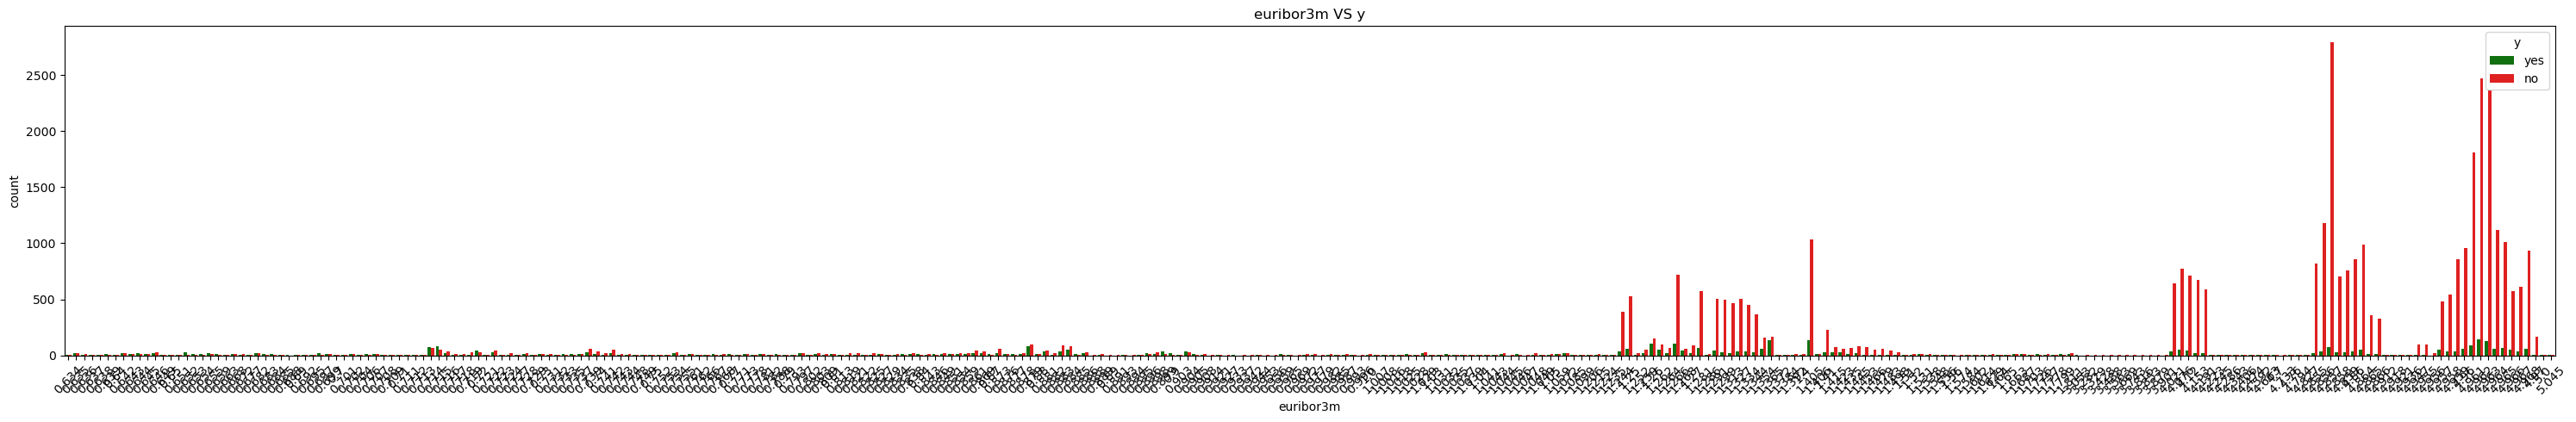

In [13]:
for col in con_cols:
    print(df[col].value_counts(normalize=True) * 100)
    plt.figure(figsize=(30, 5))
    sns.countplot(x=df[col], hue=df['y'].astype('str'), hue_order=['yes', 'no'], palette=color_palette)
    plt.title(f"{col} VS y")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### iii - Categorical Column

job
admin.           25.303486
blue-collar      22.467709
technician       16.371273
services          9.636302
management        7.099155
retired           4.175974
entrepreneur      3.535010
self-employed     3.450034
housemaid         2.573565
unemployed        2.461882
student           2.124405
unknown           0.801204
Name: proportion, dtype: float64


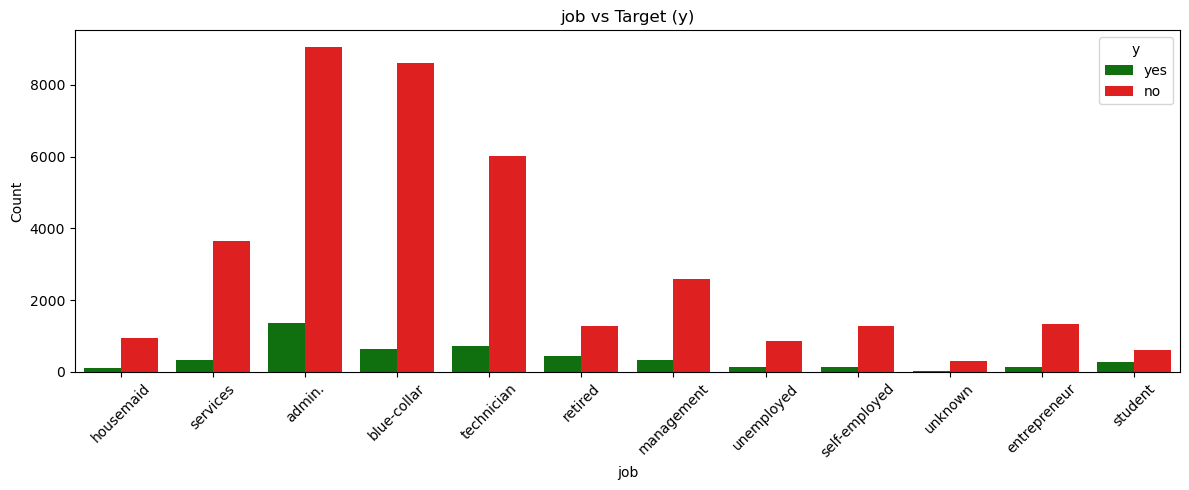

marital
married     60.522482
single      28.085850
divorced    11.197436
unknown      0.194231
Name: proportion, dtype: float64


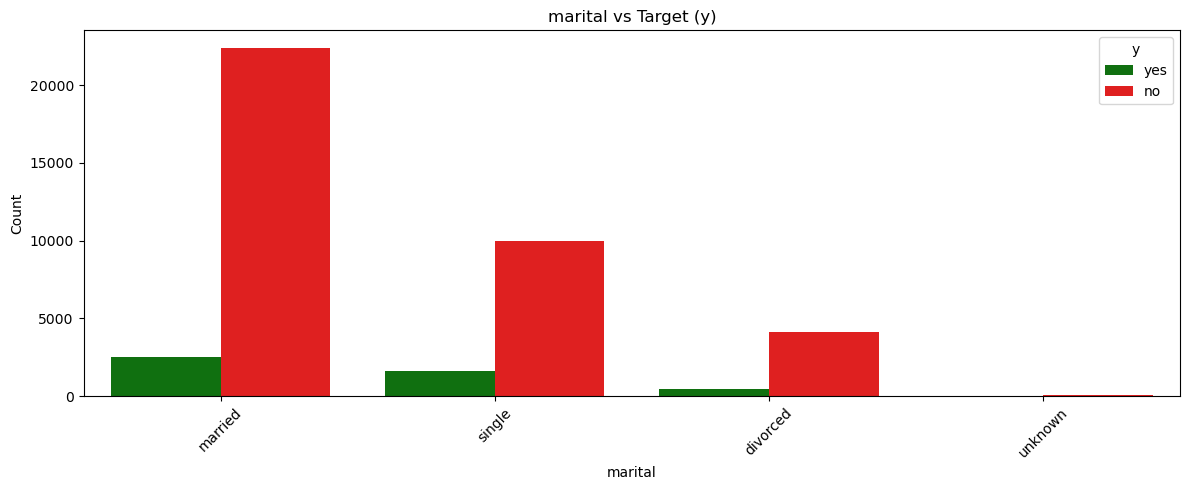

education
university.degree      29.542585
high.school            23.101389
basic.9y               14.676605
professional.course    12.729436
basic.4y               10.138875
basic.6y                5.564728
unknown                 4.202680
illiterate              0.043702
Name: proportion, dtype: float64


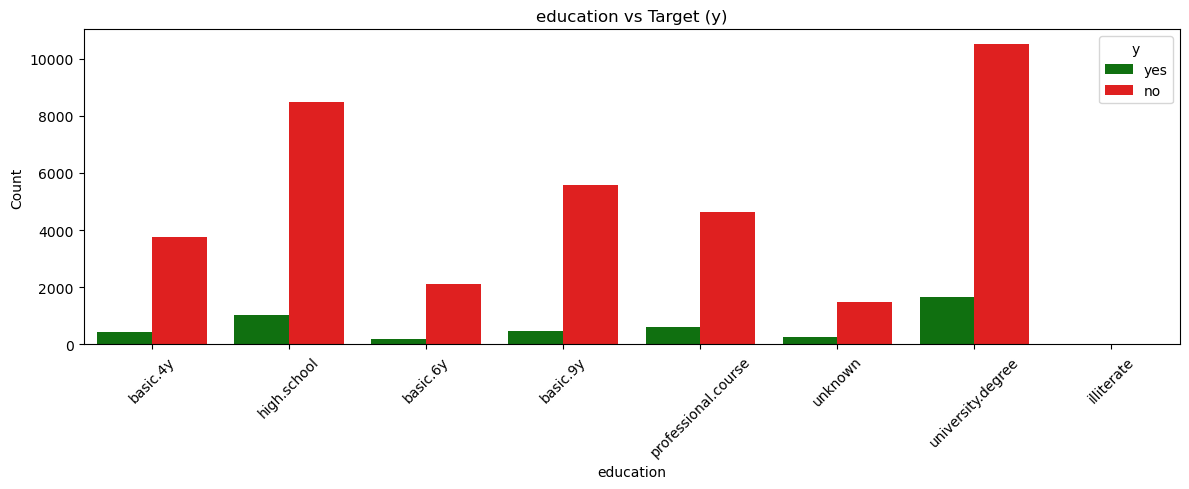

default
no         79.120132
unknown    20.872584
yes         0.007284
Name: proportion, dtype: float64


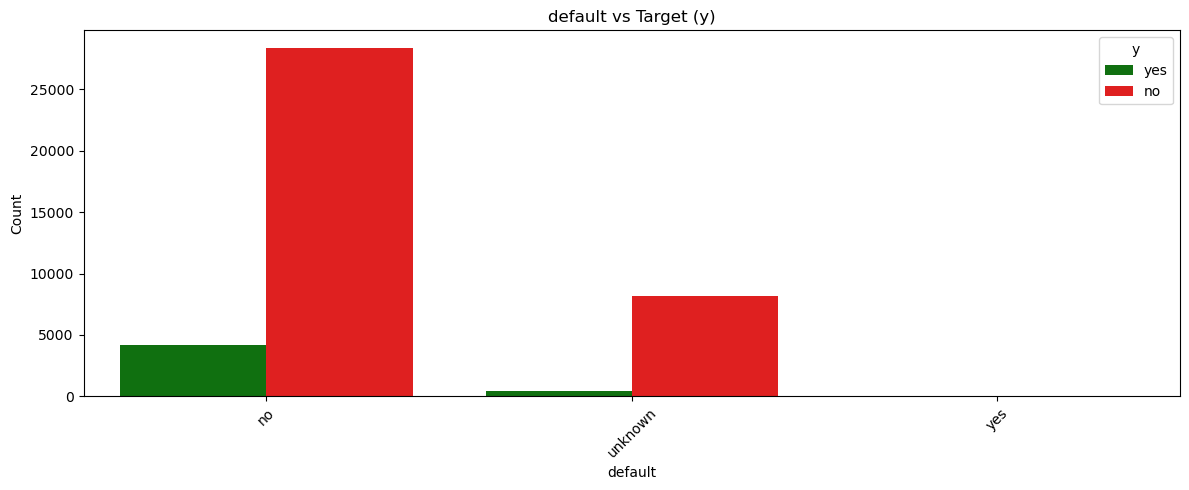

housing
yes        52.384190
no         45.212198
unknown     2.403613
Name: proportion, dtype: float64


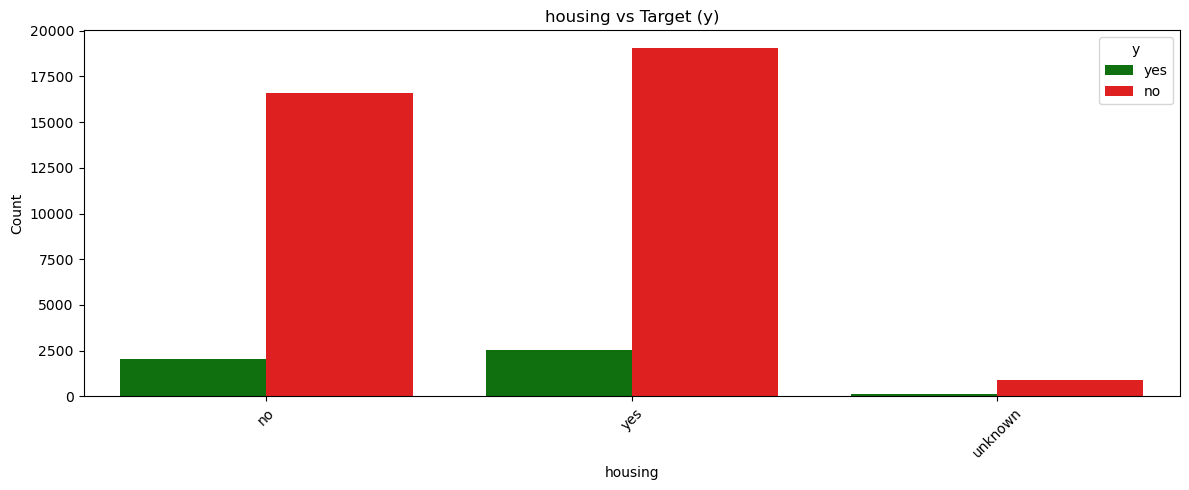

loan
no         82.426920
yes        15.169467
unknown     2.403613
Name: proportion, dtype: float64


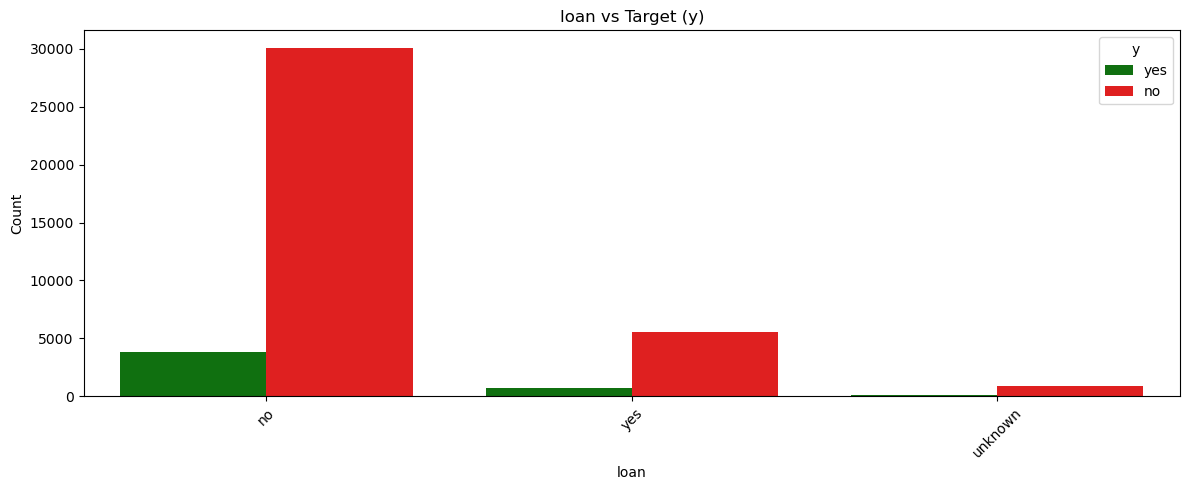

contact
cellular     63.474798
telephone    36.525202
Name: proportion, dtype: float64


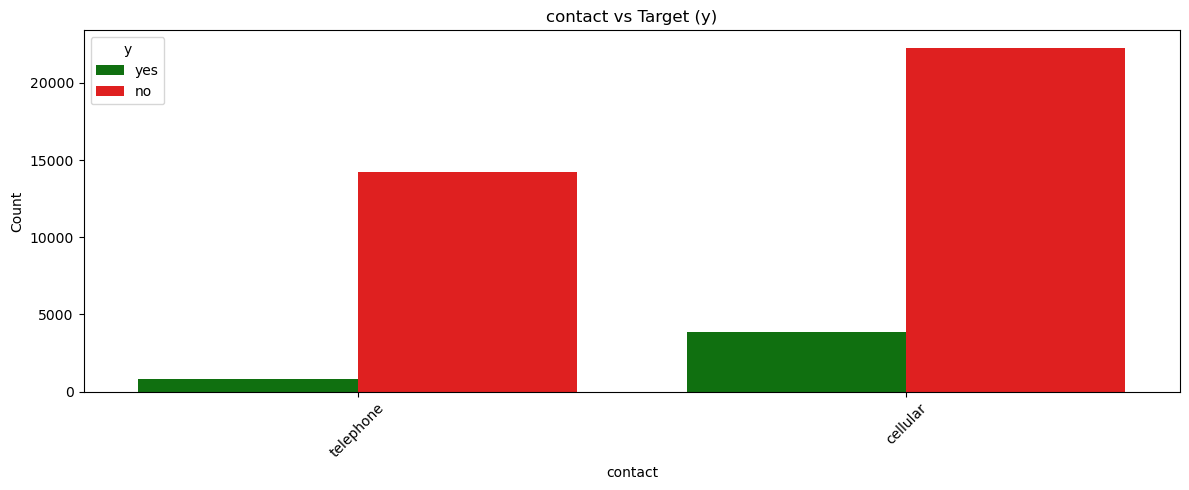

month
may    33.429640
jul    17.417694
aug    14.999514
jun    12.911528
nov     9.956784
apr     6.390211
oct     1.743226
sep     1.383898
mar     1.325629
dec     0.441876
Name: proportion, dtype: float64


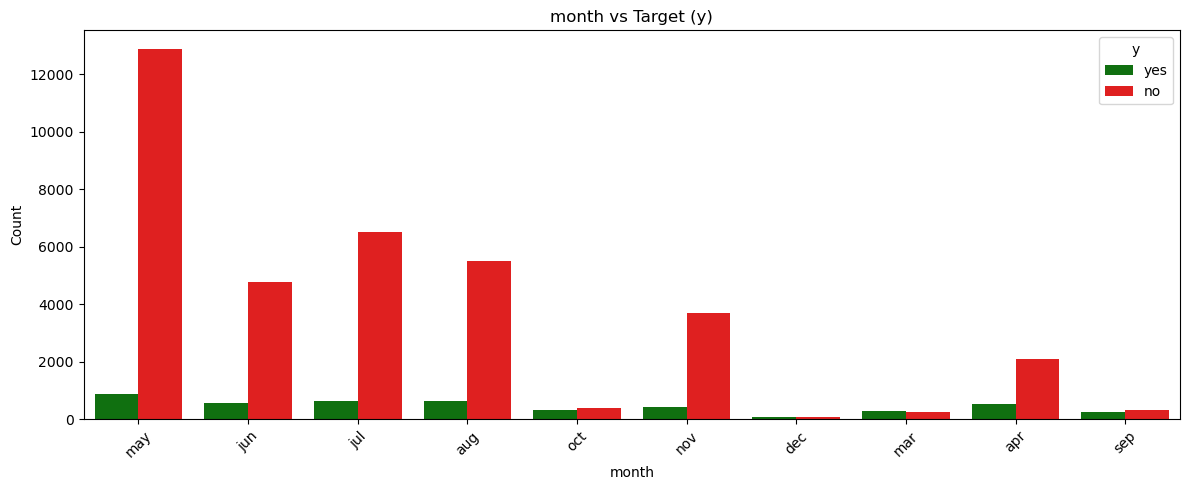

day_of_week
thu    20.935709
mon    20.671069
wed    19.748470
tue    19.641643
fri    19.003108
Name: proportion, dtype: float64


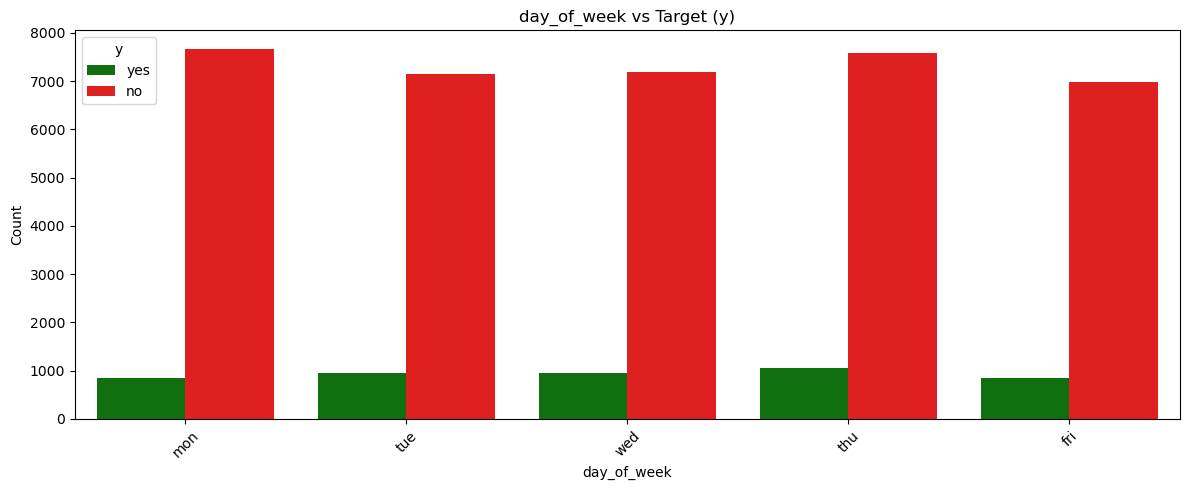

poutcome
nonexistent    86.343110
failure        10.323395
success         3.333495
Name: proportion, dtype: float64


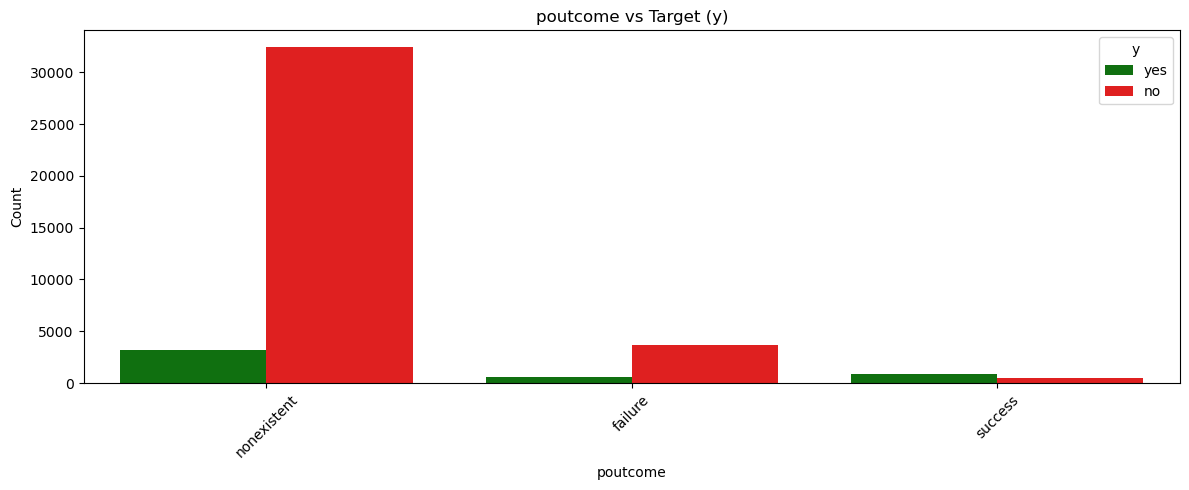

y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64


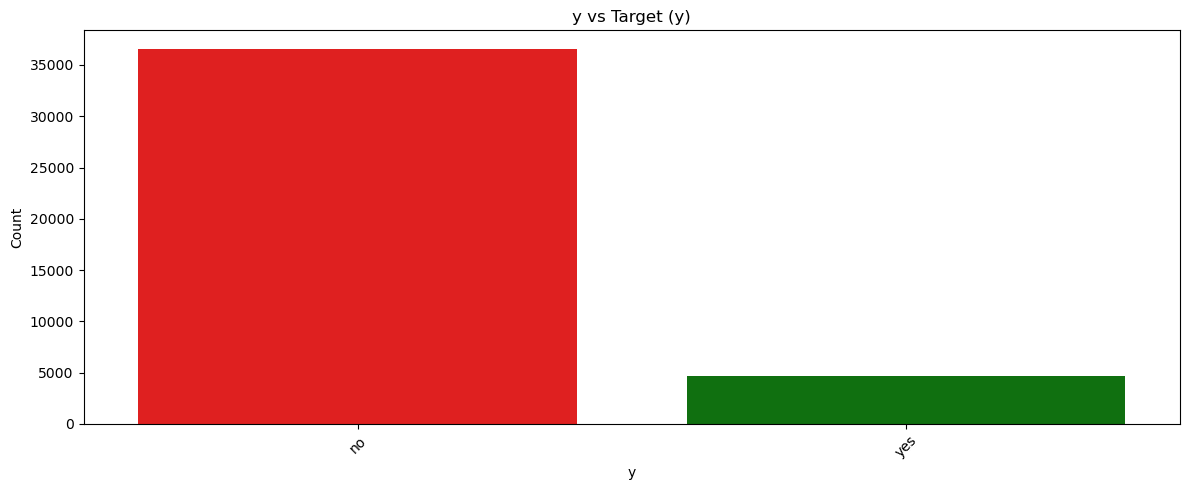

In [15]:
for col in cat_cols:
    plt.figure(figsize=(12, 5))  # Adjust figure size for readability

    print(df[col].value_counts(normalize=True) * 100)
    sns.countplot(data=df, x=col, hue=df['y'].astype('str'), hue_order=['yes', 'no'], palette=color_palette)

    plt.title(f"{col} vs Target (y)")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### iii. Multivariate Analysis

In [14]:
# converted cols into list
num_cols = df.select_dtypes(include='number').columns.tolist()
dis_cols = dis_cols.columns.tolist()
con_cols = con_cols.columns.tolist()

In [15]:
num_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [16]:
dis_cols

['previous', 'emp.var.rate', 'nr.employed']

In [17]:
con_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m']

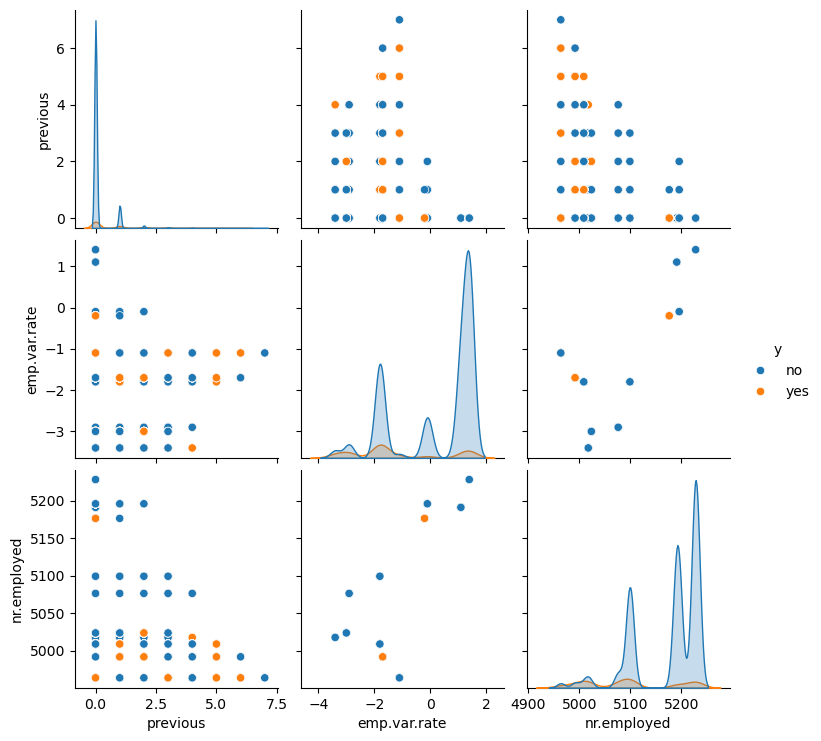

In [19]:
sns.pairplot(df[dis_cols + ['y']], hue='y')

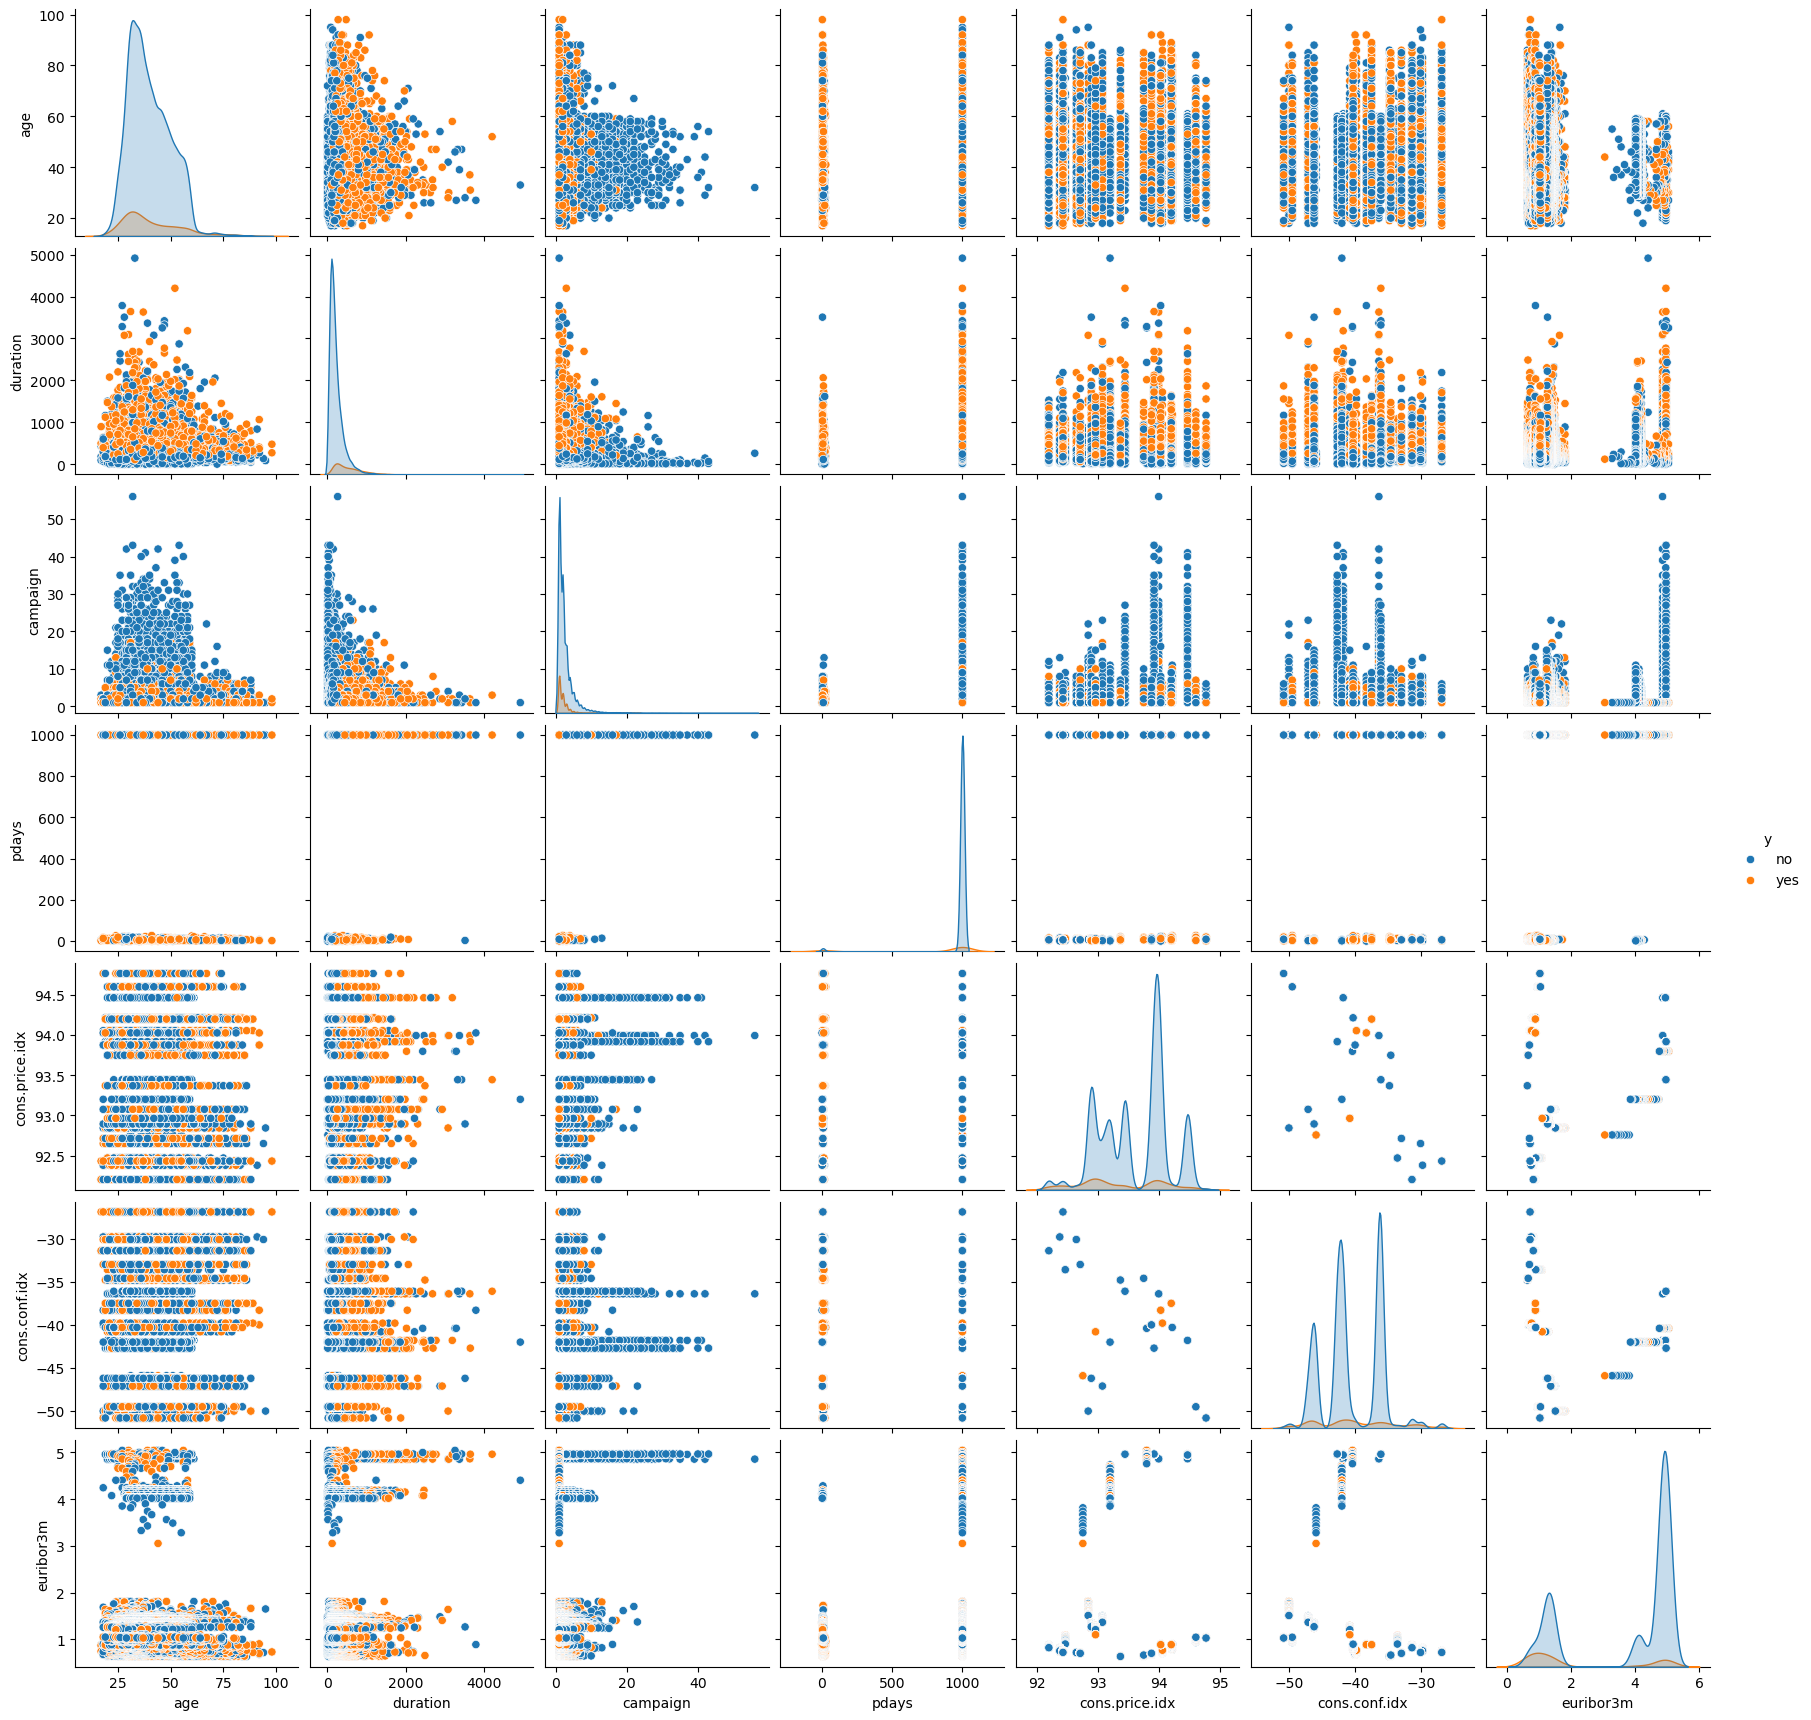

In [18]:
sns.pairplot(df[con_cols + ['y']], hue='y')

# Task 1 - Data Analysis Report

### 1.Introduction

#### -> The report alanyzes customers dataset for potential customers of term deposits with 41188 datapoints having 21 features including target variable focusing on Demographical, financial, previous campaign and social economical characteristics.

### 2.Dataset Overview

#### -> Features:Dataset comprises 21 features both numerical(10) and categorical values(11).

#### -> Target Variable: y is the target variable indicating whether the customer bought the term deposit or not.

### 3.Data Quality:

#### -> Some columns have some unknown values in "job", "marital", "default", "education", "housing", "loan" columns and no null values.

### 4.Customer Demographics

#### -> Age and Job:The dataset predominantly represents individuals with age 40 and most customers are in admin jobs.

#### -> Education:Most customers have a univerisity degree, indicating strong financial knowledge and employment stability.

#### -> Default, Housing and Loan:Most customers have no default or personal loans but most people have home loans.

### 5.Insights and Recommendations:

#### -> Insights:The analysis highlights the need for further exploration into factors influencing customers disparities across demographics and financial data. Strategies should focus on enhancing diversity and equity in customer data.

#### -> Recommendations: Implement data preprocessing steps to handle unknown values.Conduct deeper analyses to understand the impact of variables such as education and duration of calls on y differentials.

### 6.Conclusion

#### -> In conclusion, the dataset provides valuable insights into demographical distributions, financial demographics, and previous campaign data within the Portugese Bank. Further analysis and strategic initiatives can leverage these insights to optimize sales of term deposit and help bank marketing team increase sales of term deposit through campaigns.

## 5. Data Preprocessing

### i - Checking Null Values

In [19]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [20]:
# checking Unknown values which are considered Missing in dataset
print((df == 'unknown').sum())

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


In [21]:
df.marital.mode()

0    married
Name: marital, dtype: object

In [22]:
# replace unknown with mode
df['job'] == df['job'].replace('unknown', 'admin', inplace = True)

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Name: job, Length: 41188, dtype: bool

In [23]:
df.marital.mode()

0    married
Name: marital, dtype: object

In [24]:
df['marital'] = df['marital'].replace('unknown', 'married')

In [25]:
df.education.mode()

0    university.degree
Name: education, dtype: object

In [26]:
df['education'] = df['education'].replace('unknown', 'university.degree')

In [27]:
df.default.mode()

0    no
Name: default, dtype: object

In [28]:
df['default'] = df['default'].replace('unknown', 'no')

In [29]:
df.housing.mode()

0    yes
Name: housing, dtype: object

In [30]:
df['housing'] = df['housing'].replace('unknown', 'yes')

In [31]:
df.loan.mode()

0    no
Name: loan, dtype: object

In [32]:
df['loan'] = df['loan'].replace('unknown', 'no')

In [33]:
print((df == 'unknown').sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


### ii - Handling Ouliers

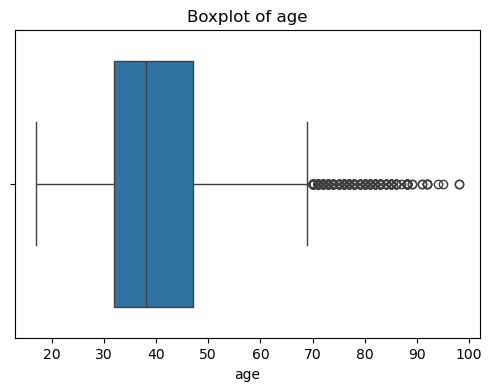

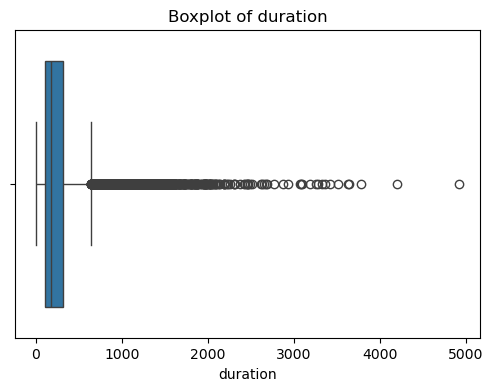

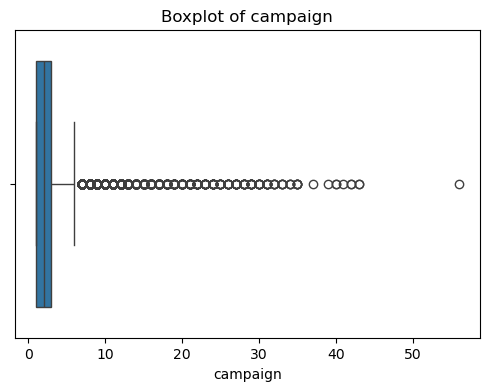

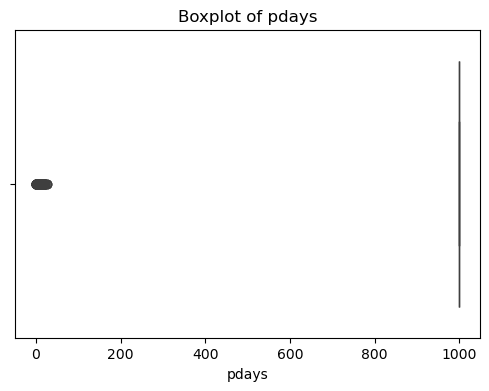

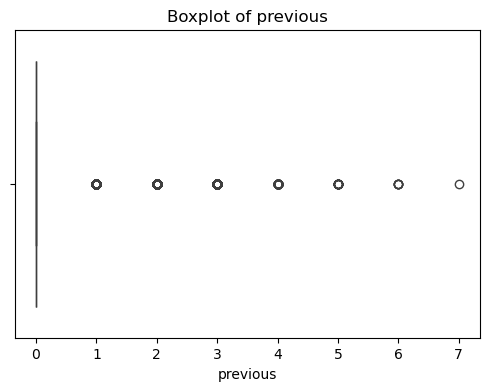

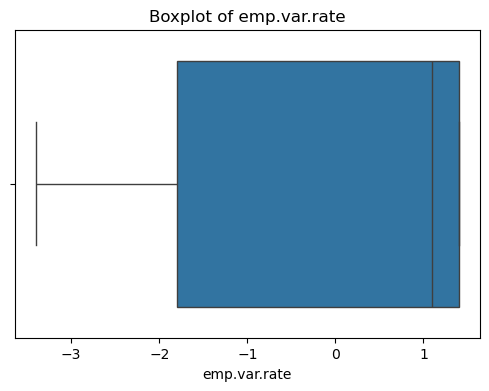

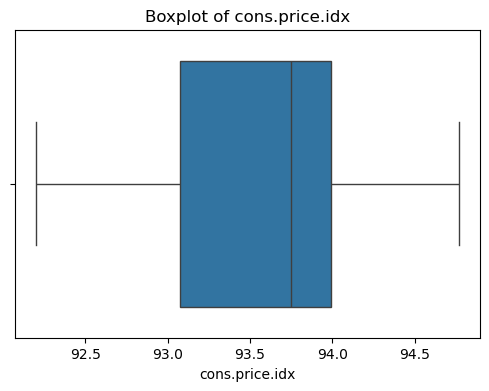

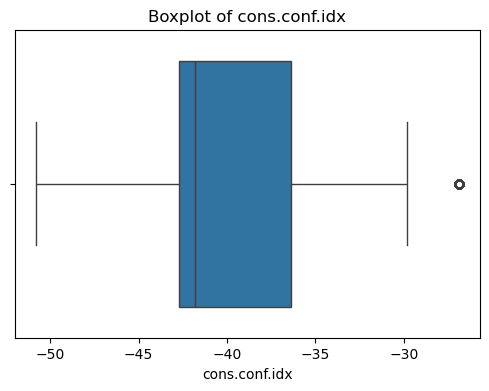

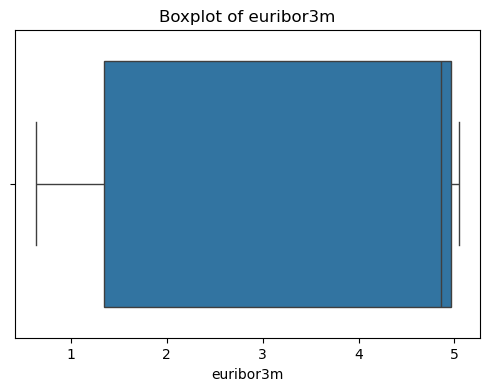

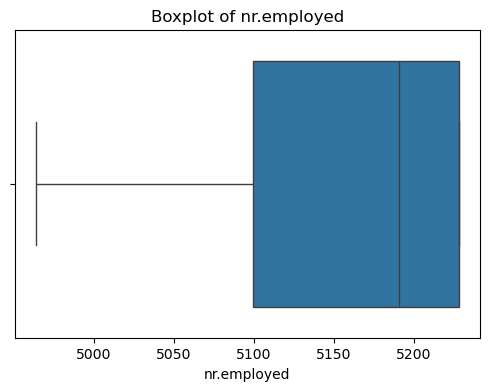

In [37]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [34]:
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)

iqr = q3 - q1

ub = q1 - 1.5 * iqr
lb = q3 + 1.5 * iqr

print(ub)
print(lb)

9.5
69.5


In [35]:
np.median(df['age'])

38.0

In [36]:
df.loc[(df['age'] > 69.5), "age"] = 38.0

In [37]:
# for duration we will remove values which are 0
df = df[df['duration'] != 0]

In [38]:
q1 = df['campaign'].quantile(0.25)
q3 = df['campaign'].quantile(0.75)

iqr = q3 - q1

ub = q1 - 1.5 * iqr
lb = q3 + 1.5 * iqr

print(ub)
print(lb)

-2.0
6.0


In [39]:
ub

-2.0

In [40]:
np.median(df['campaign'])

2.0

In [41]:
df.loc[(df['campaign'] > 6.0), "campaign"] = 2.0

In [42]:
df

age          job  marital            education default housing loan  \
0       56    housemaid  married             basic.4y      no      no   no   
1       57     services  married          high.school      no      no   no   
2       37     services  married          high.school      no     yes   no   
3       40       admin.  married             basic.6y      no      no   no   
4       56     services  married          high.school      no      no  yes   
...    ...          ...      ...                  ...     ...     ...  ...   
41183   38      retired  married  professional.course      no     yes   no   
41184   46  blue-collar  married  professional.course      no      no   no   
41185   56      retired  married    university.degree      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   
41187   38      retired  married  professional.course      no     yes   no   

         contact month day_of_week  duration  campaign  pdays  previous  \
0      telephone   may         mon       261         1    999         0   
1      telephone   may         mon       149         1    999         0   
2      telephone   may         mon       226         1    999         0   
3      telephone   may         mon       151         1    999         0   
4      telephone   may         mon       307         1    999         0   
...          ...   ...         ...       ...       ...    ...       ...   
41183   cellular   nov         fri       334         1    999         0   
41184   cellular   nov         fri       383         1    999         0   
41185   cellular   nov         fri       189         2    999         0   
41186   cellular   nov         fri       442         1    999         0   
41187   cellular   nov         fri       239         3    999         1   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent           1.1          93.994          -36.4      4.857   
1      nonexistent           1.1          93.994          -36.4      4.857   
2      nonexistent           1.1          93.994          -36.4      4.857   
3      nonexistent           1.1          93.994          -36.4      4.857   
4      nonexistent           1.1          93.994          -36.4      4.857   
...            ...           ...             ...            ...        ...   
41183  nonexistent          -1.1          94.767          -50.8      1.028   
41184  nonexistent          -1.1          94.767          -50.8      1.028   
41185  nonexistent          -1.1          94.767          -50.8      1.028   
41186  nonexistent          -1.1          94.767          -50.8      1.028   
41187      failure          -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41184 rows x 21 columns]

In [43]:
# We won't treat pdays as outliers instead we do this. 0 == 999, 1 == !999
df['pdays'] = np.where(df['pdays'] == 999, 0, 1)

In [44]:
df

age          job  marital            education default housing loan  \
0       56    housemaid  married             basic.4y      no      no   no   
1       57     services  married          high.school      no      no   no   
2       37     services  married          high.school      no     yes   no   
3       40       admin.  married             basic.6y      no      no   no   
4       56     services  married          high.school      no      no  yes   
...    ...          ...      ...                  ...     ...     ...  ...   
41183   38      retired  married  professional.course      no     yes   no   
41184   46  blue-collar  married  professional.course      no      no   no   
41185   56      retired  married    university.degree      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   
41187   38      retired  married  professional.course      no     yes   no   

         contact month day_of_week  duration  campaign  pdays  previous  \
0      telephone   may         mon       261         1      0         0   
1      telephone   may         mon       149         1      0         0   
2      telephone   may         mon       226         1      0         0   
3      telephone   may         mon       151         1      0         0   
4      telephone   may         mon       307         1      0         0   
...          ...   ...         ...       ...       ...    ...       ...   
41183   cellular   nov         fri       334         1      0         0   
41184   cellular   nov         fri       383         1      0         0   
41185   cellular   nov         fri       189         2      0         0   
41186   cellular   nov         fri       442         1      0         0   
41187   cellular   nov         fri       239         3      0         1   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent           1.1          93.994          -36.4      4.857   
1      nonexistent           1.1          93.994          -36.4      4.857   
2      nonexistent           1.1          93.994          -36.4      4.857   
3      nonexistent           1.1          93.994          -36.4      4.857   
4      nonexistent           1.1          93.994          -36.4      4.857   
...            ...           ...             ...            ...        ...   
41183  nonexistent          -1.1          94.767          -50.8      1.028   
41184  nonexistent          -1.1          94.767          -50.8      1.028   
41185  nonexistent          -1.1          94.767          -50.8      1.028   
41186  nonexistent          -1.1          94.767          -50.8      1.028   
41187      failure          -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41184 rows x 21 columns]

In [45]:
# we may apply one hot on it
df['emp.var.rate'].unique()

array([ 1.1,  1.4, -0.1, -0.2, -1.8, -2.9, -3.4, -3. , -1.7, -1.1])

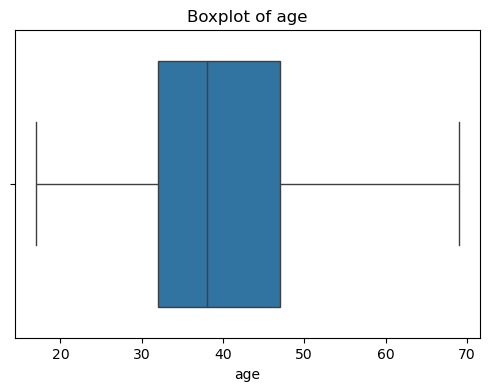

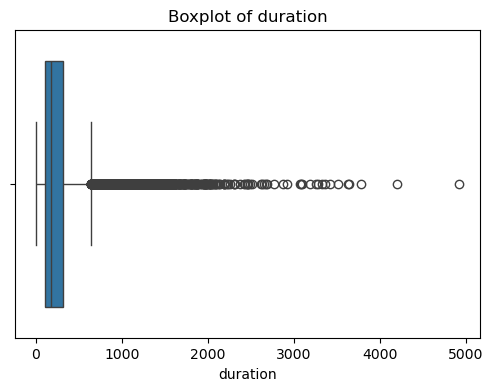

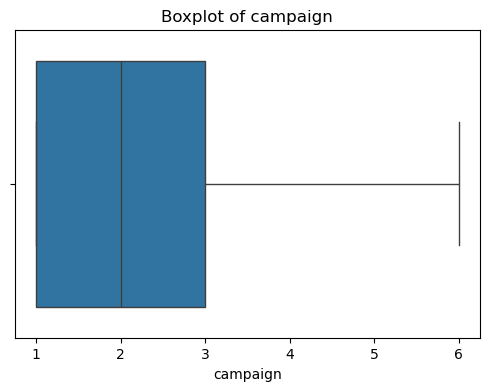

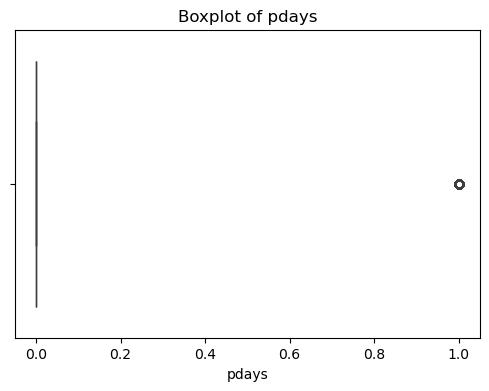

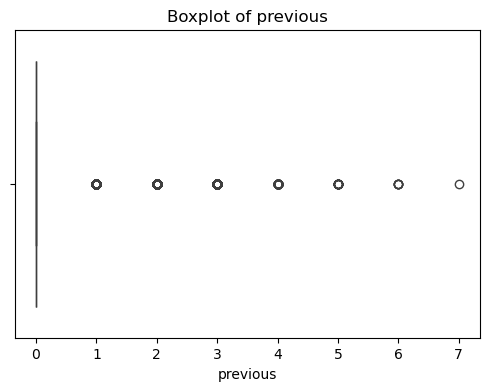

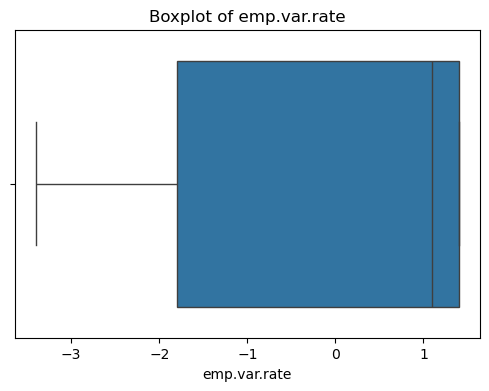

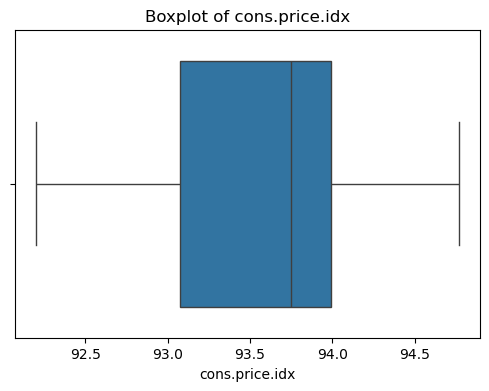

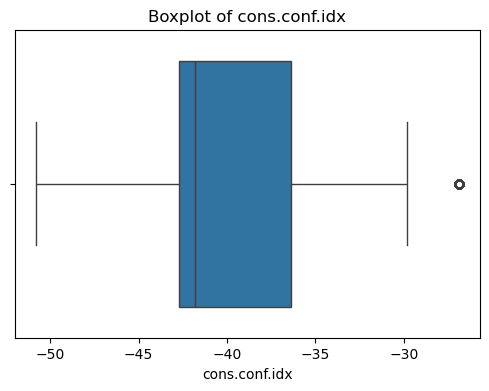

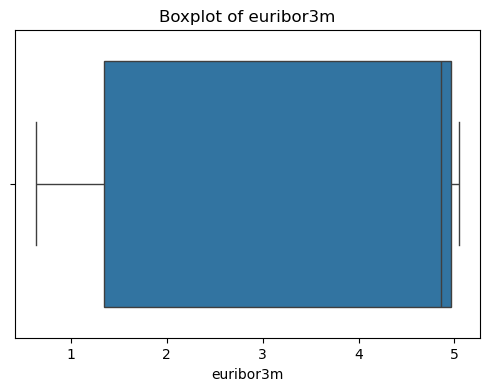

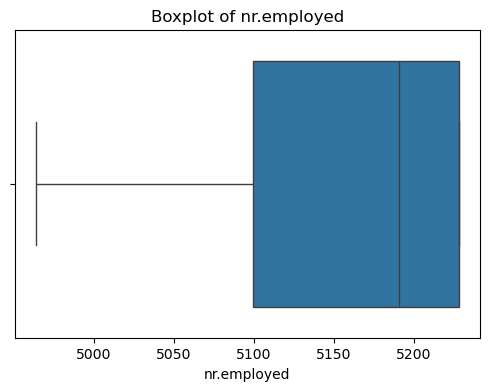

In [44]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

### ii. Encoding

In [46]:
cat_cols.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [47]:
df

age          job  marital            education default housing loan  \
0       56    housemaid  married             basic.4y      no      no   no   
1       57     services  married          high.school      no      no   no   
2       37     services  married          high.school      no     yes   no   
3       40       admin.  married             basic.6y      no      no   no   
4       56     services  married          high.school      no      no  yes   
...    ...          ...      ...                  ...     ...     ...  ...   
41183   38      retired  married  professional.course      no     yes   no   
41184   46  blue-collar  married  professional.course      no      no   no   
41185   56      retired  married    university.degree      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   
41187   38      retired  married  professional.course      no     yes   no   

         contact month day_of_week  duration  campaign  pdays  previous  \
0      telephone   may         mon       261         1      0         0   
1      telephone   may         mon       149         1      0         0   
2      telephone   may         mon       226         1      0         0   
3      telephone   may         mon       151         1      0         0   
4      telephone   may         mon       307         1      0         0   
...          ...   ...         ...       ...       ...    ...       ...   
41183   cellular   nov         fri       334         1      0         0   
41184   cellular   nov         fri       383         1      0         0   
41185   cellular   nov         fri       189         2      0         0   
41186   cellular   nov         fri       442         1      0         0   
41187   cellular   nov         fri       239         3      0         1   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent           1.1          93.994          -36.4      4.857   
1      nonexistent           1.1          93.994          -36.4      4.857   
2      nonexistent           1.1          93.994          -36.4      4.857   
3      nonexistent           1.1          93.994          -36.4      4.857   
4      nonexistent           1.1          93.994          -36.4      4.857   
...            ...           ...             ...            ...        ...   
41183  nonexistent          -1.1          94.767          -50.8      1.028   
41184  nonexistent          -1.1          94.767          -50.8      1.028   
41185  nonexistent          -1.1          94.767          -50.8      1.028   
41186  nonexistent          -1.1          94.767          -50.8      1.028   
41187      failure          -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41184 rows x 21 columns]

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['y'] = le.fit_transform(df['y'])

In [49]:
df = pd.get_dummies(df, columns=['job'], drop_first=True, dtype='int32')

In [50]:
df.marital.value_counts()

marital
married     25005
single      11568
divorced     4611
Name: count, dtype: int64

In [51]:
df = pd.get_dummies(df, columns=['marital'], drop_first=True, dtype='int32')

In [52]:
df.education.value_counts()

education
university.degree      13898
high.school             9513
basic.9y                6044
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: count, dtype: int64

In [53]:
from sklearn.preprocessing import OrdinalEncoder
education_order = [['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree']]
oe = OrdinalEncoder(categories=education_order)
df['education'] = oe.fit_transform(df[['education']])

In [54]:
df.default.value_counts()

default
no     41181
yes        3
Name: count, dtype: int64

In [55]:
df['default'] = le.fit_transform(df['default'])

In [56]:
df.housing.value_counts()

housing
yes    22563
no     18621
Name: count, dtype: int64

In [57]:
df['housing'] = le.fit_transform(df['housing'])

In [58]:
df.loan.value_counts()

loan
no     34936
yes     6248
Name: count, dtype: int64

In [59]:
df['loan'] = le.fit_transform(df['loan'])

In [60]:
df.contact.value_counts()

contact
cellular     26141
telephone    15043
Name: count, dtype: int64

In [61]:
df['contact'] = le.fit_transform(df['contact'])

In [62]:
df.month.value_counts()

month
may    13767
jul     7174
aug     6177
jun     5318
nov     4101
apr     2631
oct      718
sep      570
mar      546
dec      182
Name: count, dtype: int64

In [63]:
months_order = [['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']]
oe_month = OrdinalEncoder(categories=months_order)
df['month'] = oe_month.fit_transform(df[['month']])

In [64]:
df.day_of_week.value_counts()

day_of_week
thu    8623
mon    8513
wed    8134
tue    8088
fri    7826
Name: count, dtype: int64

In [65]:
days_order = [['mon', 'tue', 'wed', 'thu', 'fri']]
oe_week = OrdinalEncoder(categories=days_order)
df['day_of_week'] = oe_week.fit_transform(df[['day_of_week']])

In [66]:
df.poutcome.value_counts()

poutcome
nonexistent    35559
failure         4252
success         1373
Name: count, dtype: int64

In [67]:
poutcome_order = [['nonexistent', 'failure', 'success']]
oe_poutcome = OrdinalEncoder(categories=poutcome_order)
df['poutcome'] = oe_poutcome.fit_transform(df[['poutcome']])

In [68]:
df

age  education  default  housing  loan  contact  month  day_of_week  \
0       56        1.0        0        0     0        1    4.0          0.0   
1       57        4.0        0        0     0        1    4.0          0.0   
2       37        4.0        0        1     0        1    4.0          0.0   
3       40        2.0        0        0     0        1    4.0          0.0   
4       56        4.0        0        0     1        1    4.0          0.0   
...    ...        ...      ...      ...   ...      ...    ...          ...   
41183   38        5.0        0        1     0        0   10.0          4.0   
41184   46        5.0        0        0     0        0   10.0          4.0   
41185   56        6.0        0        1     0        0   10.0          4.0   
41186   44        5.0        0        0     0        0   10.0          4.0   
41187   38        5.0        0        1     0        0   10.0          4.0   

       duration  campaign  pdays  previous  poutcome  emp.var.rate  \
0           261         1      0         0       0.0           1.1   
1           149         1      0         0       0.0           1.1   
2           226         1      0         0       0.0           1.1   
3           151         1      0         0       0.0           1.1   
4           307         1      0         0       0.0           1.1   
...         ...       ...    ...       ...       ...           ...   
41183       334         1      0         0       0.0          -1.1   
41184       383         1      0         0       0.0          -1.1   
41185       189         2      0         0       0.0          -1.1   
41186       442         1      0         0       0.0          -1.1   
41187       239         3      0         1       1.0          -1.1   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  job_admin.  \
0              93.994          -36.4      4.857       5191.0  0           0   
1              93.994          -36.4      4.857       5191.0  0           0   
2              93.994          -36.4      4.857       5191.0  0           0   
3              93.994          -36.4      4.857       5191.0  0           1   
4              93.994          -36.4      4.857       5191.0  0           0   
...               ...            ...        ...          ... ..         ...   
41183          94.767          -50.8      1.028       4963.6  1           0   
41184          94.767          -50.8      1.028       4963.6  0           0   
41185          94.767          -50.8      1.028       4963.6  0           0   
41186          94.767          -50.8      1.028       4963.6  1           0   
41187          94.767          -50.8      1.028       4963.6  0           0   

       job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0                    0                 0              1               0   
1                    0                 0              0               0   
2                    0                 0              0               0   
3                    0                 0              0               0   
4                    0                 0              0               0   
...                ...               ...            ...             ...   
41183                0                 0              0               0   
41184                1                 0              0               0   
41185                0                 0              0               0   
41186                0                 0              0               0   
41187                0                 0              0               0   

       job_retired  job_self-employed  job_services  job_student  \
0                0                  0             0            0   
1                0                  0             1            0   
2                0                  0             1            0   
3                0                  0             0            0   
4                0                  0  

### iii. Handling Imbalance Data

In [69]:
from sklearn.model_selection import train_test_split
# Splitting the data set
X = df.drop(columns=['y'])
Y = df['y']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=7)

In [70]:
from imblearn.over_sampling import SMOTE
s = SMOTE(random_state=7)
X_SMOTE, Y_SMOTE = s.fit_resample(X_train, Y_train)
pd.Series(Y_SMOTE).value_counts()

y
0    27400
1    27400
Name: count, dtype: int64

### iv - Scalling

In [71]:
# Scaling features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_SMOTE)
X_test_scaled = scaler.transform(X_test)

In [72]:
X_train_scaled

array([[-0.82035709, -0.24067832, -0.00604133, ..., -0.12125209,
        -0.97844396, -0.55213686],
       [ 0.0800669 , -1.54802517, -0.00604133, ..., -0.12125209,
         1.02203094, -0.55213686],
       [ 1.68082066, -2.20169859, -0.00604133, ..., -0.12125209,
         1.02203094, -0.55213686],
       ...,
       [ 0.68034956, -0.73204944, -0.00604133, ..., -0.12125209,
        -0.97844396, -0.55213686],
       [-1.02045131, -0.24067832, -0.00604133, ..., -0.12125209,
        -0.97844396,  1.81114517],
       [-0.9204042 , -0.37906352, -0.00604133, ..., -0.12125209,
        -0.97844396, -0.55213686]])

## 6. Feature Selection

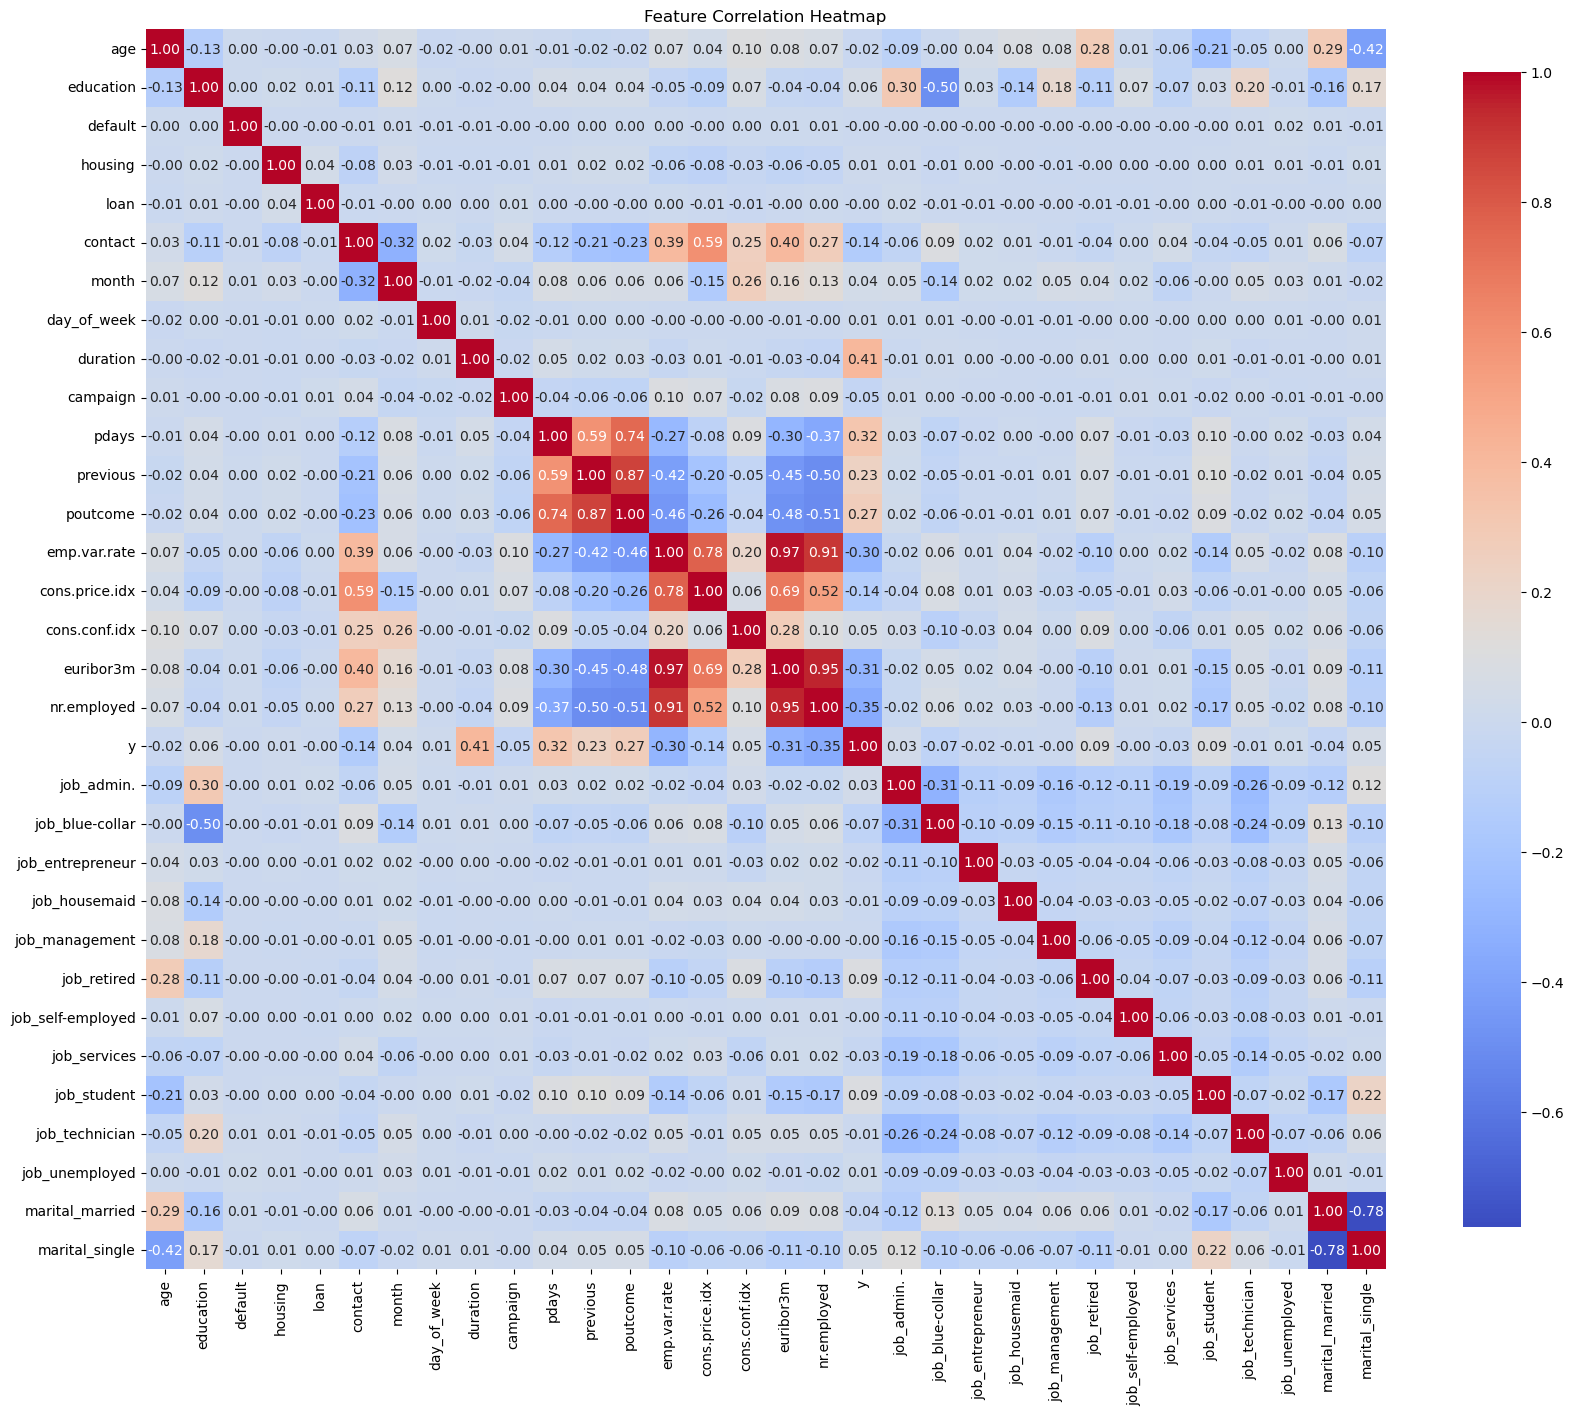

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Compute correlation matrix
correlation_matrix = df.corr(numeric_only=True)  # Only numeric columns

# Step 2: Plot heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True,
            cbar_kws={"shrink": .75})
plt.title("Feature Correlation Heatmap")
plt.show()


In [73]:
# dropped columns  which are highly correlated.
df = df.drop(['emp.var.rate', 'nr.employed'], axis=1)

# Task 2 - Creating Predictive Model

## 7. Evaluation of model

### i. Model 1 - Logistic Regression

In [74]:
from sklearn.metrics import confusion_matrix, classification_report  # Evaluation metrics
from sklearn.linear_model import LogisticRegression
# Initializing and training the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, Y_SMOTE)
# Predicting and evaluating
y_pred_log_reg = log_reg.predict(X_test_scaled)

print("Logistic Regression:")
print(confusion_matrix(Y_test, y_pred_log_reg))
print(classification_report(Y_test, y_pred_log_reg))

Logistic Regression:
[[8556  588]
 [ 477  675]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      9144
           1       0.53      0.59      0.56      1152

    accuracy                           0.90     10296
   macro avg       0.74      0.76      0.75     10296
weighted avg       0.90      0.90      0.90     10296



In [75]:
x_pred_log_reg = log_reg.predict(X_train_scaled)
print(classification_report(Y_SMOTE,x_pred_log_reg))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93     27400
           1       0.94      0.91      0.92     27400

    accuracy                           0.92     54800
   macro avg       0.92      0.92      0.92     54800
weighted avg       0.92      0.92      0.92     54800



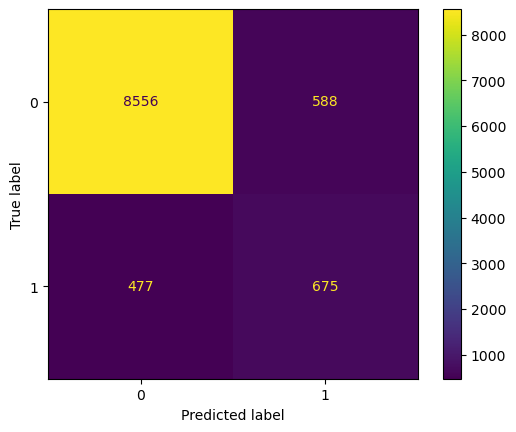

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    log_reg, X_test_scaled, Y_test)
plt.show()

### ii - Model 2 - SVM

In [77]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Create and train the model
svm_model = SVC(kernel='rbf', random_state=42)  # You can also try 'linear', 'poly', 'sigmoid'
svm_model.fit(X_train_scaled, Y_SMOTE)

# Step 2: Make predictions"
y_pred_svm = svm_model.predict(X_test_scaled)

# Step 3: Evaluate the model
print("Accuracy:", accuracy_score(Y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(Y_test, y_pred_svm))

Accuracy: 0.8995726495726496

Confusion Matrix:
 [[8622  522]
 [ 512  640]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      9144
           1       0.55      0.56      0.55      1152

    accuracy                           0.90     10296
   macro avg       0.75      0.75      0.75     10296
weighted avg       0.90      0.90      0.90     10296



In [78]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

print("SVM:")
print(confusion_matrix(Y_test, y_pred_svm))
print(classification_report(Y_test, y_pred_svm))

SVM:
[[8622  522]
 [ 512  640]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      9144
           1       0.55      0.56      0.55      1152

    accuracy                           0.90     10296
   macro avg       0.75      0.75      0.75     10296
weighted avg       0.90      0.90      0.90     10296



### iii. Model 3 - XGBoost

In [79]:
# import XGBClassifier
from xgboost import XGBClassifier
# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }          
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)
# fit the classifier to the training data
xgb_clf.fit(X_train_scaled, Y_SMOTE)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=1.0, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, ...)

In [80]:
y_pred_xgb = xgb_clf.predict(X_test_scaled)

In [81]:
print("XGBoost:")
print(confusion_matrix(Y_test, y_pred_xgb))
print(classification_report(Y_test, y_pred_xgb))

XGBoost:
[[8728  416]
 [ 515  637]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      9144
           1       0.60      0.55      0.58      1152

    accuracy                           0.91     10296
   macro avg       0.77      0.75      0.76     10296
weighted avg       0.91      0.91      0.91     10296



In [82]:
x_pred_xgb = xgb_clf.predict(X_train_scaled)
print(classification_report(Y_SMOTE,x_pred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     27400
           1       0.97      0.96      0.96     27400

    accuracy                           0.96     54800
   macro avg       0.96      0.96      0.96     54800
weighted avg       0.96      0.96      0.96     54800



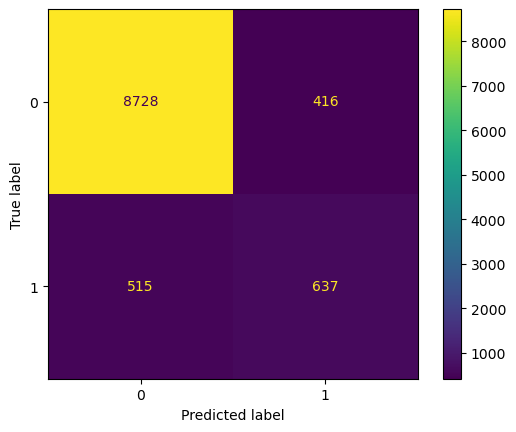

In [83]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    xgb_clf, X_test_scaled, Y_test)
plt.show()

### iv. Model 4 - ANN

In [85]:
## ANN model creation
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(50,25),activation='relu',solver='adam',
                       learning_rate_init=0.1,alpha=0.01,
                       max_iter=1000,n_iter_no_change=100,
                       random_state=10,verbose=True,batch_size=100)        ## model object creation max_iter=Stopping parameter
model.fit(X_train_scaled,Y_SMOTE)  

Iteration 1, loss = 0.23606958
Iteration 2, loss = 0.20822308
Iteration 3, loss = 0.19776767
Iteration 4, loss = 0.19592862
Iteration 5, loss = 0.19334955
Iteration 6, loss = 0.19665019
Iteration 7, loss = 0.19426578
Iteration 8, loss = 0.19103367
Iteration 9, loss = 0.19306511
Iteration 10, loss = 0.19353599
Iteration 11, loss = 0.19195881
Iteration 12, loss = 0.19206614
Iteration 13, loss = 0.19280474
Iteration 14, loss = 0.19189798
Iteration 15, loss = 0.19308235
Iteration 16, loss = 0.19507941
Iteration 17, loss = 0.19525653
Iteration 18, loss = 0.19336868
Iteration 19, loss = 0.19241871
Iteration 20, loss = 0.19328009
Iteration 21, loss = 0.19249502
Iteration 22, loss = 0.19385829
Iteration 23, loss = 0.19203837
Iteration 24, loss = 0.19389593
Iteration 25, loss = 0.19653048
Iteration 26, loss = 0.19480851
Iteration 27, loss = 0.19492878
Iteration 28, loss = 0.19672306
Iteration 29, loss = 0.19182329
Iteration 30, loss = 0.19304058
Iteration 31, loss = 0.19365948
Iteration 32, los

MLPClassifier(alpha=0.01, batch_size=100, hidden_layer_sizes=(50, 25),
              learning_rate_init=0.1, max_iter=1000, n_iter_no_change=100,
              random_state=10, verbose=True)

In [86]:
#y_predict_proba = model.predict_proba(X_test)        ## predicting the probability of class

y_predict = model.predict(X_test_scaled)
y_train_predict = model.predict(X_train_scaled)

In [87]:
y_predict = model.predict(X_test_scaled)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [89]:
## Evaluating the model created
from sklearn.metrics import accuracy_score,confusion_matrix
print("Train accuracy :",accuracy_score(Y_SMOTE,y_train_predict))
print("Test accuracy :",accuracy_score(Y_test,y_predict))

Train accuracy : 0.9235948905109489
Test accuracy : 0.9020979020979021


In [90]:
## getting the confusion matrix
pd.crosstab(y_predict,Y_test)

y         0    1
row_0           
0      8609  473
1       535  679

In [91]:
## getting classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      9144
           1       0.56      0.59      0.57      1152

    accuracy                           0.90     10296
   macro avg       0.75      0.77      0.76     10296
weighted avg       0.90      0.90      0.90     10296



In [94]:
from sklearn.metrics import classification_report
print(classification_report(Y_SMOTE,y_train_predict))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92     27400
           1       0.94      0.91      0.92     27400

    accuracy                           0.92     54800
   macro avg       0.92      0.92      0.92     54800
weighted avg       0.92      0.92      0.92     54800



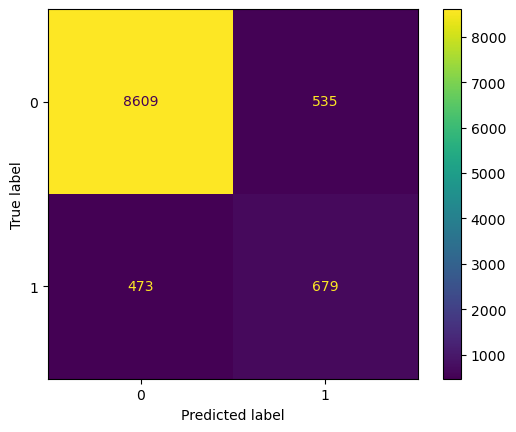

In [95]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    model, X_test_scaled, Y_test)
plt.show()

In [98]:
from sklearn.tree import DecisionTreeClassifier
# Initializing and training the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, Y_SMOTE)
# Predicting and evaluating
y_pred_dt = dt_model.predict(X_test_scaled)
print("Decision Tree:")
print(confusion_matrix(Y_test, y_pred_dt))
print(classification_report(Y_test, y_pred_dt))

Decision Tree:
[[8478  666]
 [ 543  609]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      9144
           1       0.48      0.53      0.50      1152

    accuracy                           0.88     10296
   macro avg       0.71      0.73      0.72     10296
weighted avg       0.89      0.88      0.89     10296



In [100]:
x_pred_dt_train = dt_model.predict(X_train_scaled)
print(classification_report(Y_SMOTE,x_pred_dt_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27400
           1       1.00      1.00      1.00     27400

    accuracy                           1.00     54800
   macro avg       1.00      1.00      1.00     54800
weighted avg       1.00      1.00      1.00     54800



## 8. HyperParamete Tuning

### i. Grid Search CV

In [102]:
#Define hyperparameters for Decision tree

dt_params = {'criterion':['gini','entropy'],
            'splitter':['best','random'],
             'max_depth': [None,10, 20, 30],
             'min_samples_leaf':[1,2,4]
            }

In [106]:
# Perform Grid Search for Decision Tree
dt_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                              param_grid=dt_params, cv=5)
dt_grid_search.fit(X_train_scaled, Y_SMOTE)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'splitter': ['best', 'random']})

In [107]:
dt_grid_search.cv_results_

{'mean_fit_time': array([1.05209188, 0.41027427, 1.24942946, 0.40212693, 1.00019813,
        0.38558269, 0.70536852, 0.25916328, 0.70337887, 0.26073022,
        0.71256299, 0.26807666, 0.99470472, 0.34669604, 0.97429953,
        0.33178415, 0.9466279 , 0.32912755, 0.99940214, 0.35369802,
        0.99824328, 0.38228059, 0.94899726, 0.33734384, 0.9411869 ,
        0.33414392, 1.20976114, 0.53207912, 1.01196146, 0.31701465,
        0.77389212, 0.27199984, 0.74464126, 0.25574594, 0.77110739,
        0.25264072, 1.04736543, 0.36822095, 0.98464327, 0.31919093,
        1.06747065, 0.3977519 , 1.29272375, 0.46784563, 1.18869977,
        0.34868789, 0.93218794, 0.32760005]),
 'std_fit_time': array([0.11303632, 0.0569487 , 0.23618137, 0.03175721, 0.13700403,
        0.06305325, 0.02804919, 0.0061893 , 0.02974543, 0.01487369,
        0.05926622, 0.01194881, 0.07832221, 0.01223937, 0.07802037,
        0.00771767, 0.09113178, 0.01055889, 0.07072956, 0.01446988,
        0.08302943, 0.03499133, 0.093

In [108]:
tuning_result_dt_gs = pd.DataFrame(dt_grid_search.cv_results_)
tuning_result_dt_gs

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        1.052092      0.113036         0.007789        0.000648   
1        0.410274      0.056949         0.010372        0.002218   
2        1.249429      0.236181         0.009815        0.001509   
3        0.402127      0.031757         0.009987        0.001291   
4        1.000198      0.137004         0.007389        0.001859   
5        0.385583      0.063053         0.008047        0.000134   
6        0.705369      0.028049         0.007191        0.000395   
7        0.259163      0.006189         0.007165        0.000402   
8        0.703379      0.029745         0.007180        0.000400   
9        0.260730      0.014874         0.008963        0.003004   
10       0.712563      0.059266         0.007185        0.000398   
11       0.268077      0.011949         0.007776        0.000398   
12       0.994705      0.078322         0.007800        0.000409   
13       0.346696      0.012239         0.008188        0.000417   
14       0.974300      0.078020         0.007787        0.000370   
15       0.331784      0.007718         0.008366        0.000494   
16       0.946628      0.091132         0.007781        0.000750   
17       0.329128      0.010559         0.007778        0.000746   
18       0.999402      0.070730         0.007558        0.000469   
19       0.353698      0.014470         0.010571        0.003689   
20       0.998243      0.083029         0.009377        0.002327   
21       0.382281      0.034991         0.008255        0.000602   
22       0.948997      0.093761         0.007844        0.000478   
23       0.337344      0.012083         0.008567        0.000460   
24       0.941187      0.068524         0.008131        0.000441   
25       0.334144      0.010801         0.008169        0.000377   
26       1.209761      0.246458         0.008320        0.000567   
27       0.532079      0.148451         0.013296        0.003102   
28       1.011961      0.166853         0.007370        0.000788   
29       0.317015      0.012523         0.008583        0.000802   
30       0.773892      0.055393         0.007241        0.000520   
31       0.272000      0.028613         0.009658        0.001998   
32       0.744641      0.051534         0.007199        0.000391   
33       0.255746      0.011913         0.007783        0.000731   
34       0.771107      0.033255         0.007279        0.000587   
35       0.252641      0.004689         0.008253        0.000737   
36       1.047365      0.103689         0.008204        0.000450   
37       0.368221      0.047673         0.009174        0.001928   
38       0.984643      0.064983         0.008782        0.001046   
39       0.319191      0.001972         0.008589        0.001366   
40       1.067471      0.130085         0.009368        0.001653   
41       0.397752      0.015164         0.011326        0.001176   
42       1.292724      0.102315         0.010635        0.001649   
43       0.467846      0.009516         0.012871        0.001110   
44       1.188700      0.225371         0.009882        0.002395   
45       0.348688      0.020424         0.008788        0.002141   
46       0.932188      0.074123         0.008601        0.001184   
47       0.327600      0.018393         0.008373        0.000475   

   param_criterion param_max_depth  param_min_samples_leaf param_splitter  \
0             gini            None                       1           best   
1             gini            None                       1         random   
2             gini            None                       2           best   
3             gini            None                       2         random   
4             gini            None                       4           best   
5             gini            None                       4         random   
6             gini              10                       1           best   
7             gini              10                     

In [109]:
dt_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 2,
 'splitter': 'best'}

In [110]:
# Decision Tree and Grid Search
y_pred_dt_gs = dt_grid_search.predict(X_test_scaled)
print("\nDecision Tree Grid Search Performance:")
print("Accuracy:", accuracy_score(Y_test, y_pred_dt_gs))
print("Classification Report:")
print(classification_report(Y_test, y_pred_dt_gs))


Decision Tree Grid Search Performance:
Accuracy: 0.8872377622377622
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      9144
           1       0.50      0.49      0.49      1152

    accuracy                           0.89     10296
   macro avg       0.72      0.71      0.71     10296
weighted avg       0.89      0.89      0.89     10296



In [112]:
x_pred_dt_train_gs = dt_grid_search.predict(X_train_scaled)
print(classification_report(Y_SMOTE,x_pred_dt_train_gs))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     27400
           1       0.99      0.98      0.99     27400

    accuracy                           0.99     54800
   macro avg       0.99      0.99      0.99     54800
weighted avg       0.99      0.99      0.99     54800



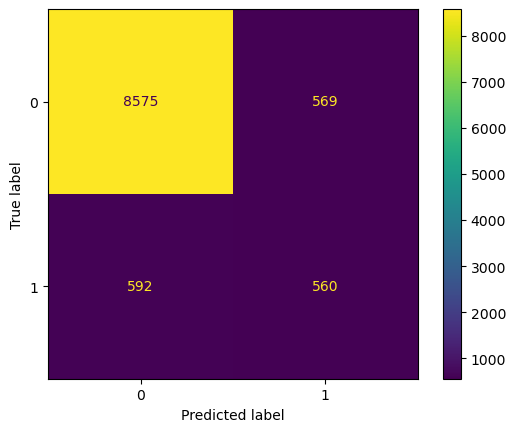

In [113]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    dt_grid_search, X_test_scaled, Y_test)
plt.show()

### v. Model 5 - Random Forest

In [115]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, Y_SMOTE)

RandomForestClassifier(random_state=42)

In [116]:
y_pred_rf = rf_model.predict(X_test_scaled)
print("Random Forest:")
print(confusion_matrix(Y_test, y_pred_rf))
print(classification_report(Y_test, y_pred_rf))

Random Forest:
[[8686  458]
 [ 505  647]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      9144
           1       0.59      0.56      0.57      1152

    accuracy                           0.91     10296
   macro avg       0.77      0.76      0.76     10296
weighted avg       0.90      0.91      0.91     10296



In [118]:
x_pred_rf_train = rf_model.predict(X_train_scaled)
print(classification_report(Y_SMOTE,x_pred_rf_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27400
           1       1.00      1.00      1.00     27400

    accuracy                           1.00     54800
   macro avg       1.00      1.00      1.00     54800
weighted avg       1.00      1.00      1.00     54800



### ii. RandomizedSearch CV (Hyper Paramete Tuning)

In [119]:
rf_params = { 
	'n_estimators': [25, 50, 100, 150], 
	'max_features': ['sqrt', 'log2', None], 
	'max_depth': [3, 6, 9], 
	'max_leaf_nodes': [3, 6, 9], 
} 

In [121]:
random_search = RandomizedSearchCV(RandomForestClassifier(), 
								rf_params) 
random_search.fit(X_train_scaled, Y_SMOTE) 
print(random_search.best_estimator_) 

RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=9)


In [122]:
model_random = RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=9,
                       n_estimators=25)
model_random.fit(X_train_scaled, Y_SMOTE) 
y_pred_rand =model_random.predict(X_test_scaled) 
print(classification_report(y_pred_rand, Y_test)) 

              precision    recall  f1-score   support

           0       0.83      0.97      0.90      7895
           1       0.77      0.37      0.50      2401

    accuracy                           0.83     10296
   macro avg       0.80      0.67      0.70     10296
weighted avg       0.82      0.83      0.80     10296



In [124]:
x_pred_rf_train_random = model_random.predict(X_train_scaled)
print(classification_report(Y_SMOTE,x_pred_rf_train_random))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87     27400
           1       0.85      0.90      0.88     27400

    accuracy                           0.87     54800
   macro avg       0.87      0.87      0.87     54800
weighted avg       0.87      0.87      0.87     54800



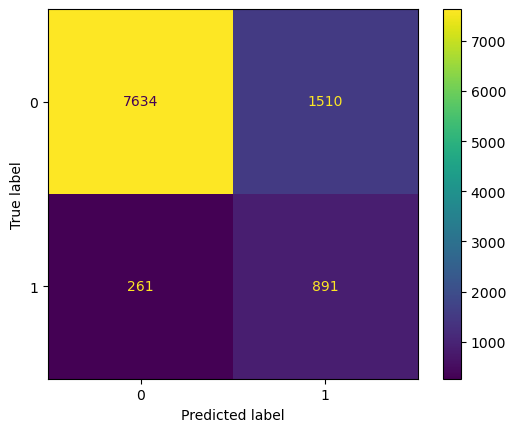

In [125]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    model_random, X_test_scaled, Y_test)
plt.show()

# Task 3 - Suggestion to Bank Market Team

# TASK 3

## Targeted Customer Profiles
- Focus on potential customers aged **25-55**, especially those with **admin** or **blue-collar jobs**, and **married individuals**.
- Personalize messaging based on:
  - These profiles
  - Their **previous campaign outcomes**  
- Goal: **Improve engagement**

---

## Educational Campaigns
- Customers with **higher education** (university or high school) are **more likely to buy** term deposits.
- To engage **less educated segments**:
  - Provide **educational content** such as:
    - Blogs
    - Webinars
  - Increase **financial literacy**
  - Highlight benefits of **term deposits**

---

## Optimized Timing and Contact Frequency
- Conduct campaigns during **May to August**
- Best days: **Mondays and Thursdays**
- Use the `campaign` feature to:
  - Adjust **frequency of contacts**
  - Ensure a gap of **20-25 days** between calls
- Purpose: Avoid fatigue & **maximize follow-up effectiveness**

---

## Multi-Channel and Economic Adjustments
- Prioritize **cellular contacts**
- Supplement phone calls with:
  - **Email**
  - **In-app notifications**
- Adjust messaging based on **economic conditions**:
  - Emphasize **safety** and **guaranteed returns** during stability (e.g., **low Euribor rates**)

---

## 8. Model Comparison Report

### i. Recall Score

In [126]:
pd.DataFrame(data = [recall_score(Y_test,y_pred_log_reg, average='weighted'),
recall_score(Y_test,y_pred_svm, average='weighted'),
recall_score(Y_test,y_pred_xgb, average='weighted'),
recall_score(Y_test,y_predict, average='weighted'),
recall_score(Y_test,y_pred_dt_gs, average='weighted'),
recall_score(Y_test,y_pred_rand, average='weighted')],index=['Logistic','SVM','XGB','ANN','DT','RF'],         
columns=['Recall Score']).sort_values(by='Recall Score',ascending=False)
#print(dt_plotting_)

Recall Score
XGB           0.909577
ANN           0.902098
SVM           0.899573
Logistic      0.896562
DT            0.887238
RF            0.827991

### ii. ROC Score

In [127]:
from sklearn.metrics import roc_auc_score
pd.DataFrame(data = [roc_auc_score(Y_test,log_reg.predict_proba(X_test_scaled)[:,1]),
                     roc_auc_score(Y_test,xgb_clf.predict_proba(X_test_scaled)[:,1]),
                     roc_auc_score(Y_test,model.predict_proba(X_test_scaled)[:,1]),
                     roc_auc_score(Y_test,dt_grid_search.predict_proba(X_test_scaled)[:,1]),
                     roc_auc_score(Y_test,model_random.predict_proba(X_test_scaled)[:,1])],index=['Logistic','XGB','ANN','DT','RF'],         
columns=['ROC SCORE']).sort_values(by='ROC SCORE',ascending=False)
#The ROC SCORE requires probability estimates (or at least a realistic rank-ordering), which one-class SVM doesn't really try to produce.

ROC SCORE
XGB        0.939246
ANN        0.921487
Logistic   0.907839
RF         0.898066
DT         0.767663

### Conclusion - XGBoost Performed best.

## 9. Report On Challenges Faced

## 1. Imbalanced Dataset
- Issue: Target variable (`y`) is **imbalanced** – fewer “yes” than “no” responses
- Solutions:
  - Used **resampling techniques** like **SMOTE**
  - Applied algorithms that handle imbalance well:
    - **Decision Trees**
    - **Random Forests**
    - **Gradient Boosting**
  - Used evaluation metrics:
    - `recall score`
    - `f1 score`
    - `roc score`
  - Avoided relying solely on **accuracy**

---

## 2. Non-Linear Relationships
- Problem: Features like **age** or **number of contacts** have **non-linear relationships** with target
- Solution:
  - Used **non-linear models** such as:
    - **Decision Trees**
    - **Random Forests**
  - Captured complex **feature interactions**

---

## 3. Missing and "Unknown" Data
- Issue: Several features contain **"unknown" values** (e.g., `age`, `job`, `education`, etc.)
- Strategy:
  - Investigated reasons for missing data
  - Approaches used:
    - **Imputed numerical features** using mean/mode
    - Treated `"unknown"` as a valid category for categorical variables
    - Decided on whether to **impute**, **remove**, or **treat separately**

---